1. getting DOB and DOS from lab data
2. clean the test names
3. filling the missing dates

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_biolab = pd.read_csv('raw_data/Biolab_Test_Results_Halabja.csv', encoding='latin-1')
df_biolab.head()

,Sample ID,Patient Name,Gender,Date of Birth,Test Name,Unit,Category,Result,Date of Sample\n
0,118,Xalil Ahmad Mhamad,Male,16/04/1959,Blood Sugar,mg/dl,Diabetes Test,95,16/04/2023
1,126,Dyar Omar,Male,16/04/1986,Blood Sugar,mg/dl,Diabetes Test,86,16/04/2023
2,132,Fatah Mhamad Qadr,Male,16/04/1970,Blood Sugar,mg/dl,Diabetes Test,84,16/04/2023
3,177,Sesna Qubad Anwar,Female,17/04/1973,Blood Sugar,mg/dl,Diabetes Test,84,17/04/2023
4,179,Bayan Abdulla Abdurahman,Female,17/04/1981,Blood Sugar,mg/dl,Diabetes Test,96,17/04/2023


In [3]:
df_darugha = pd.read_csv('raw_data/Darugha_Lab_Test_Results_Slemani.csv', encoding='latin-1')
df_darugha.head()

,Sample ID,Patient Name,Gender,Date of Birth,Test Name,Unit,Category,Result,Date of Sample\r\n
0,13234,sargul hama amin abdulla,Female,5/1/1975,Glucose,mg/dl,Diabetes Test,105.21,5/1/2025
1,13240,mohammed Ebrahim,Male,6/1/1935,Glucose,mg/dl,Diabetes Test,98.05,6/1/2025
2,13250,Salm Hasan,Male,7/1/1960,Glucose,mg/dl,Diabetes Test,202.23,7/1/2025
3,13251,rebin samdar,Male,7/1/2003,Glucose,mg/dl,Diabetes Test,87.91,7/1/2025
4,13253,brsada abas khwa karam,Female,7/1/1967,Glucose,mg/dl,Diabetes Test,109.24,7/1/2025


In [4]:
df_hawkari = pd.read_csv('raw_data/Hawkari_Lab_Test_Results_Halabja.csv', encoding='latin-1')
df_hawkari.head()

,Sample ID,Patient Name,Gender,Date of Birth,Test Name,Unit,Category,Result,Date of Sample\r\n
0,2384,Shawnm Tofiq Salh,Female,1/1/1954,Blood Sugar,mg/dl,Diabetes Test,110,27/08/2023
1,2387,Hanar Omar Sharif,Female,1/1/2006,Blood Sugar,mg/dl,Diabetes Test,91,27/08/2023
2,2391,abid kaka mahmud ali,Male,27/08/1970,Blood Sugar,mg/dl,Diabetes Test,112,27/08/2023
3,2400,rabiea hasan saed,Female,27/08/1943,Blood Sugar,mg/dl,Diabetes Test,138,27/08/2023
4,2406,Amad Sarkar Hsen,Male,27/08/2015,Blood Sugar,mg/dl,Diabetes Test,100,27/08/2023


In [5]:
# Check basic info and missing values for each dataframe

print("=== BIOLAB DATAFRAME ===")
print("Shape:", df_biolab.shape)
print("\nData types:")
print(df_biolab.dtypes)
print("\nMissing values per column:")
print(df_biolab.isnull().sum())
print("\nMissing values percentage:")
print((df_biolab.isnull().sum() / len(df_biolab)) * 100)

print("\n" + "="*50)
print("=== DARUGHA DATAFRAME ===")
print("Shape:", df_darugha.shape)
print("\nData types:")
print(df_darugha.dtypes)
print("\nMissing values per column:")
print(df_darugha.isnull().sum())
print("\nMissing values percentage:")
print((df_darugha.isnull().sum() / len(df_darugha)) * 100)

print("\n" + "="*50)
print("=== HAWKARI DATAFRAME ===")
print("Shape:", df_hawkari.shape)
print("\nData types:")
print(df_hawkari.dtypes)
print("\nMissing values per column:")
print(df_hawkari.isnull().sum())
print("\nMissing values percentage:")
print((df_hawkari.isnull().sum() / len(df_hawkari)) * 100)

=== BIOLAB DATAFRAME ===
Shape: (84179, 9)

Data types:
Sample ID            int64
Patient Name        object
Gender              object
Date of Birth       object
Test Name           object
Unit                object
Category            object
Result              object
Date of Sample\n    object
dtype: object

Missing values per column:
Sample ID               0
Patient Name            0
Gender                  0
Date of Birth           0
Test Name               0
Unit                12806
Category                0
Result                  0
Date of Sample\n        0
dtype: int64

Missing values percentage:
Sample ID            0.00000
Patient Name         0.00000
Gender               0.00000
Date of Birth        0.00000
Test Name            0.00000
Unit                15.21282
Category             0.00000
Result               0.00000
Date of Sample\n     0.00000
dtype: float64

=== DARUGHA DATAFRAME ===
Shape: (2823, 9)

Data types:
Sample ID              int64
Patient Name          

In [14]:
# Analyze the Result column in each dataframe to understand numeric vs string values

print("=== BIOLAB RESULT COLUMN ANALYSIS ===")
print(f"Total records: {len(df_biolab)}")
print(f"Unique result values: {df_biolab['Result'].nunique()}")

# Check data types in Result column
biolab_numeric = pd.to_numeric(df_biolab['Result'], errors='coerce')
biolab_numeric_count = biolab_numeric.notna().sum()
biolab_string_count = len(df_biolab) - biolab_numeric_count

print(f"Numeric values: {biolab_numeric_count} ({biolab_numeric_count/len(df_biolab)*100:.1f}%)")
print(f"String/Text values: {biolab_string_count} ({biolab_string_count/len(df_biolab)*100:.1f}%)")

print("\nSample numeric values:")
print(df_biolab[biolab_numeric.notna()]['Result'].head(10).tolist())
print("\nSample string values:")
print(df_biolab[biolab_numeric.isna()]['Result'].value_counts().head(10))

print("\n" + "="*60)
print("=== DARUGHA RESULT COLUMN ANALYSIS ===")
print(f"Total records: {len(df_darugha)}")
print(f"Unique result values: {df_darugha['Result'].nunique()}")

darugha_numeric = pd.to_numeric(df_darugha['Result'], errors='coerce')
darugha_numeric_count = darugha_numeric.notna().sum()
darugha_string_count = len(df_darugha) - darugha_numeric_count

print(f"Numeric values: {darugha_numeric_count} ({darugha_numeric_count/len(df_darugha)*100:.1f}%)")
print(f"String/Text values: {darugha_string_count} ({darugha_string_count/len(df_darugha)*100:.1f}%)")

print("\nSample numeric values:")
print(df_darugha[darugha_numeric.notna()]['Result'].head(10).tolist())
print("\nSample string values:")
print(df_darugha[darugha_numeric.isna()]['Result'].value_counts().head(10))

print("\n" + "="*60)
print("=== HAWKARI RESULT COLUMN ANALYSIS ===")
print(f"Total records: {len(df_hawkari)}")
print(f"Unique result values: {df_hawkari['Result'].nunique()}")

hawkari_numeric = pd.to_numeric(df_hawkari['Result'], errors='coerce')
hawkari_numeric_count = hawkari_numeric.notna().sum()
hawkari_string_count = len(df_hawkari) - hawkari_numeric_count

print(f"Numeric values: {hawkari_numeric_count} ({hawkari_numeric_count/len(df_hawkari)*100:.1f}%)")
print(f"String/Text values: {hawkari_string_count} ({hawkari_string_count/len(df_hawkari)*100:.1f}%)")

print("\nSample numeric values:")
print(df_hawkari[hawkari_numeric.notna()]['Result'].head(10).tolist())
print("\nSample string values:")
print(df_hawkari[hawkari_numeric.isna()]['Result'].value_counts().head(10))

=== BIOLAB RESULT COLUMN ANALYSIS ===
Total records: 84179
Unique result values: 8638
Numeric values: 71495 (84.9%)
String/Text values: 12684 (15.1%)

Sample numeric values:
['95', '86', '84', '84', '96', '157', '106', '88', '86', '95']

Sample string values:
Result
Attached         2886
attached         1865
Negative  -Ve    1005
attach            982
Negative -Ve      645
Negative          586
<0.1              434
<3                361
Negative -ve      291
Positive  +Ve     275
Name: count, dtype: int64

=== DARUGHA RESULT COLUMN ANALYSIS ===
Total records: 2823
Unique result values: 1896
Numeric values: 2600 (92.1%)
String/Text values: 223 (7.9%)

Sample numeric values:
['105.21', '98.05', '202.23', '87.91', '109.24', '92.54', '254.36', '442.4', '125.02', '94.61']

Sample string values:
Result
Negative            180
Negative (-ve)        7
Positive              6
negative              6
>100.0                2
Positive (+ve)        2
O (positive) +ve      2
A positive            

In [31]:
# Get unique combinations of Test Name, Unit, and Category for each dataframe
print("Creating unique test groups for each dataframe...")

# Biolab unique groups
biolab_unique_groups = df_biolab[['Test Name', 'Unit', 'Category']].drop_duplicates().reset_index(drop=True)
biolab_unique_groups['Lab'] = 'Biolab'

# Darugha unique groups
darugha_unique_groups = df_darugha[['Test Name', 'Unit', 'Category']].drop_duplicates().reset_index(drop=True)
darugha_unique_groups['Lab'] = 'Darugha'

# Hawkari unique groups
hawkari_unique_groups = df_hawkari[['Test Name', 'Unit', 'Category']].drop_duplicates().reset_index(drop=True)
hawkari_unique_groups['Lab'] = 'Hawkari'

print("=== BIOLAB UNIQUE GROUPS ===")
print(f"Total unique combinations: {len(biolab_unique_groups)}")
print(biolab_unique_groups.head(10))

print("\n=== DARUGHA UNIQUE GROUPS ===")
print(f"Total unique combinations: {len(darugha_unique_groups)}")
print(darugha_unique_groups.head(10))

print("\n=== HAWKARI UNIQUE GROUPS ===")
print(f"Total unique combinations: {len(hawkari_unique_groups)}")
print(hawkari_unique_groups.head(10))

# Combine all unique groups into one dataframe
all_unique_groups = pd.concat([biolab_unique_groups, darugha_unique_groups, hawkari_unique_groups], 
                              ignore_index=True)

print(f"\n=== ALL LABS COMBINED UNIQUE GROUPS ===")
print(f"Total unique combinations across all labs: {len(all_unique_groups)}")

# Get truly unique combinations across all labs (removing duplicates)
global_unique_groups = all_unique_groups[['Test Name', 'Unit', 'Category']].drop_duplicates().reset_index(drop=True)
print(f"Global unique combinations (no duplicates): {len(global_unique_groups)}")

# Show sample of combined data
print("\nSample of all unique groups:")
print(all_unique_groups.head(15))

# Show some statistics
print(f"\n=== STATISTICS ===")
print(f"Biolab unique test-unit-category combinations: {len(biolab_unique_groups)}")
print(f"Darugha unique test-unit-category combinations: {len(darugha_unique_groups)}")
print(f"Hawkari unique test-unit-category combinations: {len(hawkari_unique_groups)}")
print(f"Total when combined: {len(all_unique_groups)}")
print(f"Global unique (deduplicated): {len(global_unique_groups)}")


Creating unique test groups for each dataframe...
=== BIOLAB UNIQUE GROUPS ===
Total unique combinations: 181
            Test Name   Unit       Category     Lab
0         Blood Sugar  mg/dl  Diabetes Test  Biolab
1               HBA1C      %  Diabetes Test  Biolab
2             Insulin  IU/Ml  Diabetes Test  Biolab
3  Fastin Blood Sugar  mg/dl           OGTT  Biolab
4                1 hr  mg/dl           OGTT  Biolab
5                2 hr  mg/dl           OGTT  Biolab
6         Typhoid IgG    NaN  Serology Test  Biolab
7         Typhoid IgM    NaN  Serology Test  Biolab
8                 CRP    NaN  Serology Test  Biolab
9         H.Pylori Ab    NaN  Serology Test  Biolab

=== DARUGHA UNIQUE GROUPS ===
Total unique combinations: 39
          Test Name    Unit               Category      Lab
0           Glucose   mg/dl          Diabetes Test  Darugha
1             HBA1C       %          Diabetes Test  Darugha
2       Typhoid IgG     NaN          Serology Test  Darugha
3       Typhoid I

In [34]:
all_unique_groups.to_csv('processed_data/all_unique_test_unit_category_combinations.csv', index=False)

In [42]:
df_std_test_names_chatgpt = pd.read_csv('processed_data/tests_with_standard_names_chatgpt.csv', encoding='latin-1')
print(f"Total Unique Test Names before standardizing test names:")
print(df_std_test_names_chatgpt['Test Name'].nunique())

print(f"Total Unique Test Names in standard names file USING CHATGPT:")
print(df_std_test_names_chatgpt['Standard Test Name'].nunique())

Total Unique Test Names before standardizing test names:
231
Total Unique Test Names in standard names file USING CHATGPT:
215


In [43]:
df_std_test_names_deepseek = pd.read_csv('processed_data/tests_with_standard_names_deepseek.csv', encoding='latin-1')
print(f"Total Unique Test Names before standardizing test names:")
print(df_std_test_names_deepseek['Test Name'].nunique())

print(f"Total Unique Test Names in standard names file USING DEEPSEEK:")
print(df_std_test_names_deepseek['Standard Test Name'].nunique())

Total Unique Test Names before standardizing test names:
231
Total Unique Test Names in standard names file USING DEEPSEEK:
213


**WE GO WITH DEEPSEEK**

In [46]:
# Create a mapping dictionary from df_std_test_names_deepseek
mapping_dict = {}
for _, row in df_std_test_names_deepseek.iterrows():
    key = (row['Test Name'], row['Unit'] if pd.notna(row['Unit']) else None, row['Category'], row['Lab'])
    mapping_dict[key] = row['Standard Test Name']

print(f"Created mapping dictionary with {len(mapping_dict)} entries")

# Function to get standard test name
def get_standard_test_name(row, lab_name):
    key = (row['Test Name'], row['Unit'] if pd.notna(row['Unit']) else None, row['Category'], lab_name)
    return mapping_dict.get(key, row['Test Name'])  # Return original if no match found

# Add Standard Test Name column to each dataframe
print("Adding Standard Test Name column to Biolab dataframe...")
df_biolab['Standard Test Name'] = df_biolab.apply(lambda row: get_standard_test_name(row, 'Biolab'), axis=1)

print("Adding Standard Test Name column to Darugha dataframe...")
df_darugha['Standard Test Name'] = df_darugha.apply(lambda row: get_standard_test_name(row, 'Darugha'), axis=1)

print("Adding Standard Test Name column to Hawkari dataframe...")
df_hawkari['Standard Test Name'] = df_hawkari.apply(lambda row: get_standard_test_name(row, 'Hawkari'), axis=1)

print("Standard Test Name columns added successfully!")

# Show statistics
print(f"\n=== BIOLAB STANDARDIZATION RESULTS ===")
print(f"Total records: {len(df_biolab)}")
print(f"Unique original test names: {df_biolab['Test Name'].nunique()}")
print(f"Unique standard test names: {df_biolab['Standard Test Name'].nunique()}")
reduction_biolab = df_biolab['Test Name'].nunique() - df_biolab['Standard Test Name'].nunique()
print(f"Reduction: {reduction_biolab} test names")

print(f"\n=== DARUGHA STANDARDIZATION RESULTS ===")
print(f"Total records: {len(df_darugha)}")
print(f"Unique original test names: {df_darugha['Test Name'].nunique()}")
print(f"Unique standard test names: {df_darugha['Standard Test Name'].nunique()}")
reduction_darugha = df_darugha['Test Name'].nunique() - df_darugha['Standard Test Name'].nunique()
print(f"Reduction: {reduction_darugha} test names")

print(f"\n=== HAWKARI STANDARDIZATION RESULTS ===")
print(f"Total records: {len(df_hawkari)}")
print(f"Unique original test names: {df_hawkari['Test Name'].nunique()}")
print(f"Unique standard test names: {df_hawkari['Standard Test Name'].nunique()}")
reduction_hawkari = df_hawkari['Test Name'].nunique() - df_hawkari['Standard Test Name'].nunique()
print(f"Reduction: {reduction_hawkari} test names")

# Show sample results
print("\n=== SAMPLE STANDARDIZATION RESULTS ===")
print("Biolab sample:")
print(df_biolab[['Test Name', 'Standard Test Name', 'Category', 'Unit']].head())
print("\nDarugha sample:")
print(df_darugha[['Test Name', 'Standard Test Name', 'Category', 'Unit']].head())
print("\nHawkari sample:")
print(df_hawkari[['Test Name', 'Standard Test Name', 'Category', 'Unit']].head())

Created mapping dictionary with 381 entries
Adding Standard Test Name column to Biolab dataframe...
Adding Standard Test Name column to Darugha dataframe...
Adding Standard Test Name column to Hawkari dataframe...
Standard Test Name columns added successfully!

=== BIOLAB STANDARDIZATION RESULTS ===
Total records: 84179
Unique original test names: 168
Unique standard test names: 173
Reduction: -5 test names

=== DARUGHA STANDARDIZATION RESULTS ===
Total records: 2823
Unique original test names: 39
Unique standard test names: 39
Reduction: 0 test names

=== HAWKARI STANDARDIZATION RESULTS ===
Total records: 70383
Unique original test names: 156
Unique standard test names: 157
Reduction: -1 test names

=== SAMPLE STANDARDIZATION RESULTS ===
Biolab sample:
     Test Name Standard Test Name       Category   Unit
0  Blood Sugar        Blood Sugar  Diabetes Test  mg/dl
1  Blood Sugar        Blood Sugar  Diabetes Test  mg/dl
2  Blood Sugar        Blood Sugar  Diabetes Test  mg/dl
3  Blood Sug

In [56]:
# Drop the Outcome and Outcome_original columns from each dataframe
df_biolab_clean = df_biolab.drop(['Outcome', 'Outcome_original'], axis=1)
df_darugha_clean = df_darugha.drop(['Outcome', 'Outcome_original'], axis=1)
df_hawkari_clean = df_hawkari.drop(['Outcome', 'Outcome_original'], axis=1)
# Rename columns: Date of Sample\n to DOS and Date of Birth to DOB
df_biolab_clean = df_biolab_clean.rename(columns={
    'Date of Sample\n': 'DOS',
    'Date of Birth': 'DOB'
})

df_darugha_clean = df_darugha_clean.rename(columns={
    'Date of Sample\r\n': 'DOS',
    'Date of Birth': 'DOB'
})

df_hawkari_clean = df_hawkari_clean.rename(columns={
    'Date of Sample\r\n': 'DOS',
    'Date of Birth': 'DOB'
})

print("Column names after renaming:")
print(f"Biolab columns: {df_biolab_clean.columns.tolist()}")
print(f"Darugha columns: {df_darugha_clean.columns.tolist()}")
print(f"Hawkari columns: {df_hawkari_clean.columns.tolist()}")

# Add a source lab column to identify which lab each record came from
df_biolab_clean['Lab'] = 'Biolab'
df_darugha_clean['Lab'] = 'Darugha'
df_hawkari_clean['Lab'] = 'Hawkari'

# Combine all three dataframes into one
df_combined = pd.concat([df_biolab_clean, df_darugha_clean, df_hawkari_clean], 
                       ignore_index=True)

print(f"Combined dataframe shape: {df_combined.shape}")
print(f"Total records: {len(df_combined):,}")
print(f"\nRecords by lab:")
print(df_combined['Lab'].value_counts())
print(f"\nColumns in combined dataframe:")
print(df_combined.columns.tolist())
print(f"\nSample of combined data:")
print(df_combined.head())

Column names after renaming:
Biolab columns: ['Sample ID', 'Patient Name', 'Gender', 'DOB', 'Test Name', 'Unit', 'Category', 'Result', 'DOS', 'Standard Test Name']
Darugha columns: ['Sample ID', 'Patient Name', 'Gender', 'DOB', 'Test Name', 'Unit', 'Category', 'Result', 'DOS', 'Standard Test Name']
Hawkari columns: ['Sample ID', 'Patient Name', 'Gender', 'DOB', 'Test Name', 'Unit', 'Category', 'Result', 'DOS', 'Standard Test Name']
Combined dataframe shape: (157385, 11)
Total records: 157,385

Records by lab:
Lab
Biolab     84179
Hawkari    70383
Darugha     2823
Name: count, dtype: int64

Columns in combined dataframe:
['Sample ID', 'Patient Name', 'Gender', 'DOB', 'Test Name', 'Unit', 'Category', 'Result', 'DOS', 'Standard Test Name', 'Lab']

Sample of combined data:
   Sample ID              Patient Name  Gender         DOB    Test Name  \
0        118        Xalil Ahmad Mhamad    Male  16/04/1959  Blood Sugar   
1        126                 Dyar Omar    Male  16/04/1986  Blood Suga

In [57]:
df_combined.head()

,Sample ID,Patient Name,Gender,DOB,Test Name,Unit,Category,Result,DOS,Standard Test Name,Lab
0,118,Xalil Ahmad Mhamad,Male,16/04/1959,Blood Sugar,mg/dl,Diabetes Test,95,16/04/2023,Blood Sugar,Biolab
1,126,Dyar Omar,Male,16/04/1986,Blood Sugar,mg/dl,Diabetes Test,86,16/04/2023,Blood Sugar,Biolab
2,132,Fatah Mhamad Qadr,Male,16/04/1970,Blood Sugar,mg/dl,Diabetes Test,84,16/04/2023,Blood Sugar,Biolab
3,177,Sesna Qubad Anwar,Female,17/04/1973,Blood Sugar,mg/dl,Diabetes Test,84,17/04/2023,Blood Sugar,Biolab
4,179,Bayan Abdulla Abdurahman,Female,17/04/1981,Blood Sugar,mg/dl,Diabetes Test,96,17/04/2023,Blood Sugar,Biolab


In [58]:
# Comprehensive data insights for df_combined dataframe
print("="*80)
print("COMPREHENSIVE DATA INSIGHTS FOR df_combined")
print("="*80)

# Basic information
print(f"\n1. BASIC INFORMATION")
print(f"   Shape: {df_combined.shape}")
print(f"   Total records: {len(df_combined):,}")
print(f"   Total columns: {len(df_combined.columns)}")

# Memory usage
print(f"\n2. MEMORY USAGE")
print(f"   Memory usage: {df_combined.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Data types
print(f"\n3. DATA TYPES")
print(df_combined.dtypes)

# Null values analysis
print(f"\n4. NULL VALUES ANALYSIS")
null_counts = df_combined.isnull().sum()
null_percentages = (null_counts / len(df_combined)) * 100

null_analysis = pd.DataFrame({
    'Column': df_combined.columns,
    'Null_Count': null_counts.values,
    'Null_Percentage': null_percentages.values,
    'Non_Null_Count': len(df_combined) - null_counts.values
})

print(null_analysis.to_string(index=False))

# Records by lab distribution
print(f"\n5. RECORDS BY LAB")
lab_distribution = df_combined['Lab'].value_counts()
lab_percentages = (lab_distribution / len(df_combined)) * 100

for lab, count in lab_distribution.items():
    percentage = lab_percentages[lab]
    print(f"   {lab}: {count:,} records ({percentage:.1f}%)")

# Gender distribution
print(f"\n6. GENDER DISTRIBUTION")
gender_distribution = df_combined['Gender'].value_counts()
gender_percentages = (gender_distribution / len(df_combined)) * 100

for gender, count in gender_distribution.items():
    percentage = gender_percentages[gender]
    print(f"   {gender}: {count:,} records ({percentage:.1f}%)")

# Categories analysis
print(f"\n7. TEST CATEGORIES ANALYSIS")
category_distribution = df_combined['Category'].value_counts()
print(f"   Total unique categories: {df_combined['Category'].nunique()}")
print(f"   Top 10 categories:")
for i, (category, count) in enumerate(category_distribution.head(10).items(), 1):
    percentage = (count / len(df_combined)) * 100
    print(f"   {i:2d}. {category}: {count:,} ({percentage:.1f}%)")

# Test names analysis
print(f"\n8. TEST NAMES ANALYSIS")
print(f"   Original test names: {df_combined['Test Name'].nunique():,}")
print(f"   Standard test names: {df_combined['Standard Test Name'].nunique():,}")
test_reduction = df_combined['Test Name'].nunique() - df_combined['Standard Test Name'].nunique()
print(f"   Standardization reduced by: {test_reduction} test names")

# Units analysis
print(f"\n9. UNITS ANALYSIS")
print(f"   Total unique units: {df_combined['Unit'].nunique()}")
print(f"   Records with missing units: {df_combined['Unit'].isnull().sum():,} ({(df_combined['Unit'].isnull().sum()/len(df_combined)*100):.1f}%)")

unit_distribution = df_combined['Unit'].value_counts()
print(f"   Top 10 units:")
for i, (unit, count) in enumerate(unit_distribution.head(10).items(), 1):
    percentage = (count / len(df_combined)) * 100
    print(f"   {i:2d}. {unit}: {count:,} ({percentage:.1f}%)")

# Results analysis - numeric vs text
print(f"\n10. RESULTS ANALYSIS")
# Try to convert results to numeric
numeric_results = pd.to_numeric(df_combined['Result'], errors='coerce')
numeric_count = numeric_results.notna().sum()
text_count = len(df_combined) - numeric_count

print(f"    Numeric results: {numeric_count:,} ({numeric_count/len(df_combined)*100:.1f}%)")
print(f"    Text/String results: {text_count:,} ({text_count/len(df_combined)*100:.1f}%)")

# Sample text results
print(f"\n    Sample text results (top 10):")
text_results = df_combined[numeric_results.isna()]['Result'].value_counts().head(10)
for result, count in text_results.items():
    print(f"    '{result}': {count:,}")

# Date analysis
print(f"\n11. DATE ANALYSIS")
print(f"    DOB (Date of Birth) - Sample values:")
print(f"    {df_combined['DOB'].head().tolist()}")
print(f"    DOS (Date of Sample) - Sample values:")
print(f"    {df_combined['DOS'].head().tolist()}")

# Sample ID analysis
print(f"\n12. SAMPLE ID ANALYSIS")
print(f"    Unique sample IDs: {df_combined['Sample ID'].nunique():,}")
print(f"    Total records: {len(df_combined):,}")
print(f"    Average tests per sample: {len(df_combined) / df_combined['Sample ID'].nunique():.1f}")

# Check for duplicates
print(f"\n13. DUPLICATE ANALYSIS")
duplicate_rows = df_combined.duplicated().sum()
print(f"    Complete duplicate rows: {duplicate_rows:,}")

# Check for potential duplicates based on key columns
potential_duplicates = df_combined.duplicated(subset=['Sample ID', 'Test Name', 'DOS']).sum()
print(f"    Potential duplicates (same Sample ID, Test Name, DOS): {potential_duplicates:,}")

# Standard test names distribution
print(f"\n14. TOP 15 STANDARD TEST NAMES")
std_test_distribution = df_combined['Standard Test Name'].value_counts().head(15)
for i, (test, count) in enumerate(std_test_distribution.items(), 1):
    percentage = (count / len(df_combined)) * 100
    print(f"    {i:2d}. {test}: {count:,} ({percentage:.1f}%)")

# Data quality summary
print(f"\n15. DATA QUALITY SUMMARY")
print(f"    ✓ No missing values in: Sample ID, Patient Name, Gender, DOB, Test Name, Category, Result, DOS, Standard Test Name, Lab")
print(f"    ⚠ Missing values in: Unit ({df_combined['Unit'].isnull().sum():,} records, {(df_combined['Unit'].isnull().sum()/len(df_combined)*100):.1f}%)")
print(f"    ✓ All labs represented: {', '.join(df_combined['Lab'].unique())}")
print(f"    ✓ Both genders represented: {', '.join(df_combined['Gender'].unique())}")
print(f"    ✓ Wide variety of tests: {df_combined['Standard Test Name'].nunique():,} standardized test types")

print(f"\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)

COMPREHENSIVE DATA INSIGHTS FOR df_combined

1. BASIC INFORMATION
   Shape: (157385, 11)
   Total records: 157,385
   Total columns: 11

2. MEMORY USAGE
   Memory usage: 89.61 MB

3. DATA TYPES
Sample ID              int64
Patient Name          object
Gender                object
DOB                   object
Test Name             object
Unit                  object
Category              object
Result                object
DOS                   object
Standard Test Name    object
Lab                   object
dtype: object

4. NULL VALUES ANALYSIS
            Column  Null_Count  Null_Percentage  Non_Null_Count
         Sample ID           0         0.000000          157385
      Patient Name           0         0.000000          157385
            Gender           0         0.000000          157385
               DOB           0         0.000000          157385
         Test Name           0         0.000000          157385
              Unit       15564         9.889125          141821


In [59]:
# Removing Gender = 'Child'

print("Removing records with Gender = 'Child'")
print(f"Original shape: {df_combined.shape}")
df_combined = df_combined[df_combined['Gender'] != 'Child'].copy()

# Display the updated dataframe information
print(f"Updated shape: {df_combined.shape}")
print("Updated gender distribution:")
print(df_combined['Gender'].value_counts())

Removing records with Gender = 'Child'
Original shape: (157385, 11)
Updated shape: (157361, 11)
Updated gender distribution:
Gender
Female    99584
Male      57777
Name: count, dtype: int64


Extracting date components from DOB and DOS...


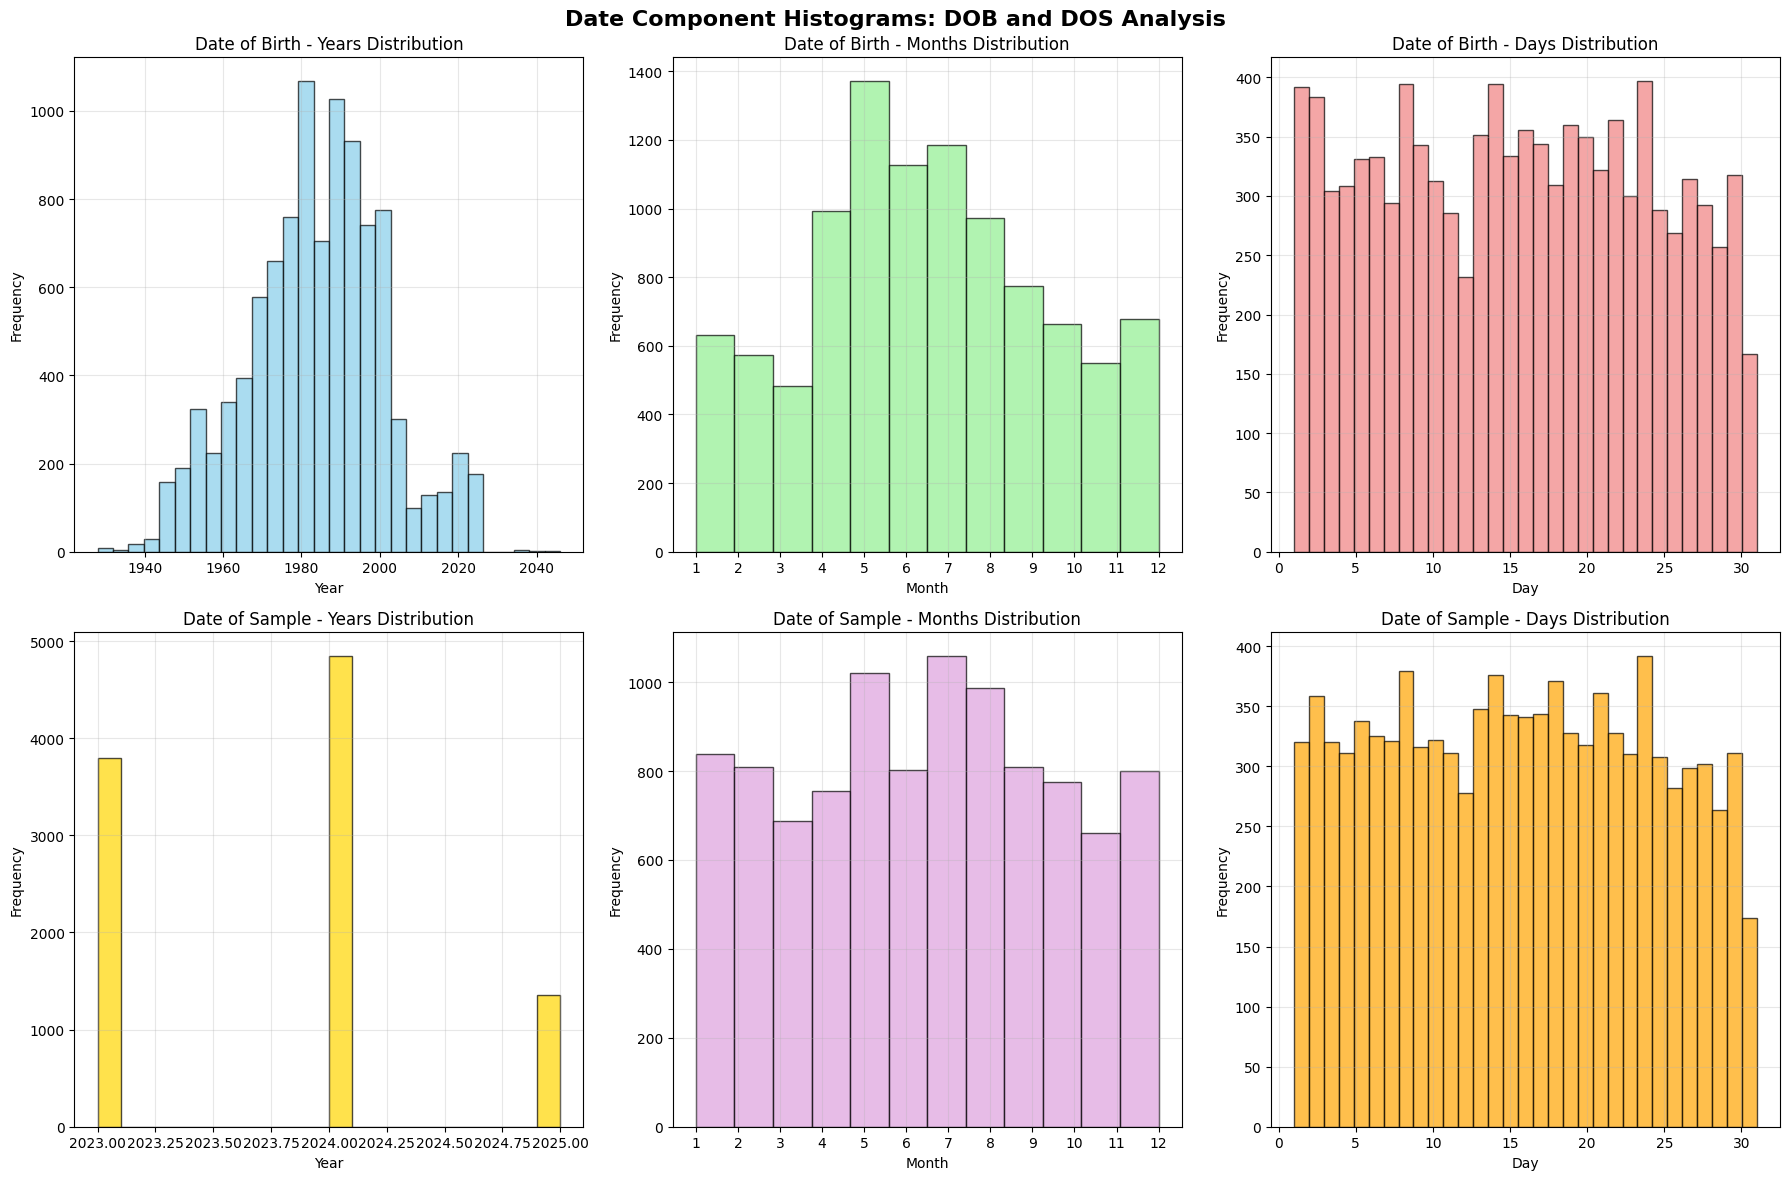


=== DATE ANALYSIS SUMMARY (Sample of 10000 records) ===

DATE OF BIRTH (DOB) ANALYSIS:
Valid DOB extractions: 9999/10000 (100.0%)
DOB Year range: 1928 - 2046
Most common DOB month: 5.0
Most common DOB day: 24.0

DATE OF SAMPLE (DOS) ANALYSIS:
Valid DOS extractions: 10000/10000 (100.0%)
DOS Year range: 2023 - 2025
Most common DOS month: 7
Most common DOS day: 24

=== SAMPLE OF EXTRACTED DATES ===
          DOB         DOS  DOB_Year  DOB_Month  DOB_Day  DOS_Year  DOS_Month  \
0  16/04/1959  16/04/2023    1959.0        4.0     16.0      2023          4   
1  16/04/1986  16/04/2023    1986.0        4.0     16.0      2023          4   
2  16/04/1970  16/04/2023    1970.0        4.0     16.0      2023          4   
3  17/04/1973  17/04/2023    1973.0        4.0     17.0      2023          4   
4  17/04/1981  17/04/2023    1981.0        4.0     17.0      2023          4   
5  17/04/1966  17/04/2023    1966.0        4.0     17.0      2023          4   
6  17/04/1969  17/04/2023    1969.0     

In [60]:
# Extract year, month, and day from DOB and DOS columns for histogram analysis

def extract_date_components(date_string):
    """Extract year, month, day from various date formats"""
    if pd.isna(date_string):
        return None, None, None
    
    date_str = str(date_string).strip()
    
    # Try splitting by '/' first (most common format)
    if '/' in date_str:
        parts = date_str.split('/')
        if len(parts) == 3:
            try:
                day = int(parts[0])
                month = int(parts[1])
                year = int(parts[2])
                
                # Convert 2-digit years to 4-digit
                if year < 100:
                    if year > 50:  # Assume 1950-1999
                        year += 1900
                    else:  # Assume 2000-2050
                        year += 2000
                
                # Validate ranges
                if 1 <= day <= 31 and 1 <= month <= 12 and 1900 <= year <= 2100:
                    return year, month, day
            except ValueError:
                pass
    
    # Try splitting by '-' as fallback
    if '-' in date_str:
        parts = date_str.split('-')
        if len(parts) == 3:
            try:
                # Try dd-mm-yyyy format first
                day = int(parts[0])
                month = int(parts[1])
                year = int(parts[2])
                
                # Convert 2-digit years to 4-digit
                if year < 100:
                    if year > 50:
                        year += 1900
                    else:
                        year += 2000
                
                if 1 <= day <= 31 and 1 <= month <= 12 and 1900 <= year <= 2100:
                    return year, month, day
                    
                # Try yyyy-mm-dd format if dd-mm-yyyy fails
                year = int(parts[0])
                month = int(parts[1])
                day = int(parts[2])
                
                if 1900 <= year <= 2100 and 1 <= month <= 12 and 1 <= day <= 31:
                    return year, month, day
            except ValueError:
                pass
    
    return None, None, None

# Extract date components for both DOB and DOS
print("Extracting date components from DOB and DOS...")

# Sample a subset for processing (you can remove this to process all data)
sample_size = min(10000, len(df_combined))  # Process first 10k records for speed
df_sample = df_combined.head(sample_size).copy()

# Extract DOB components
dob_components = df_sample['DOB'].apply(extract_date_components)
df_sample['DOB_Year'] = [comp[0] for comp in dob_components]
df_sample['DOB_Month'] = [comp[1] for comp in dob_components]
df_sample['DOB_Day'] = [comp[2] for comp in dob_components]

# Extract DOS components
dos_components = df_sample['DOS'].apply(extract_date_components)
df_sample['DOS_Year'] = [comp[0] for comp in dos_components]
df_sample['DOS_Month'] = [comp[1] for comp in dos_components]
df_sample['DOS_Day'] = [comp[2] for comp in dos_components]

# Create histograms
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Date Component Histograms: DOB and DOS Analysis', fontsize=16, fontweight='bold')

# DOB Year histogram
axes[0, 0].hist(df_sample['DOB_Year'].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Date of Birth - Years Distribution')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# DOB Month histogram
axes[0, 1].hist(df_sample['DOB_Month'].dropna(), bins=12, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Date of Birth - Months Distribution')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].grid(True, alpha=0.3)

# DOB Day histogram
axes[0, 2].hist(df_sample['DOB_Day'].dropna(), bins=31, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 2].set_title('Date of Birth - Days Distribution')
axes[0, 2].set_xlabel('Day')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].grid(True, alpha=0.3)

# DOS Year histogram
axes[1, 0].hist(df_sample['DOS_Year'].dropna(), bins=20, alpha=0.7, color='gold', edgecolor='black')
axes[1, 0].set_title('Date of Sample - Years Distribution')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)

# DOS Month histogram
axes[1, 1].hist(df_sample['DOS_Month'].dropna(), bins=12, alpha=0.7, color='plum', edgecolor='black')
axes[1, 1].set_title('Date of Sample - Months Distribution')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_xticks(range(1, 13))
axes[1, 1].grid(True, alpha=0.3)

# DOS Day histogram
axes[1, 2].hist(df_sample['DOS_Day'].dropna(), bins=31, alpha=0.7, color='orange', edgecolor='black')
axes[1, 2].set_title('Date of Sample - Days Distribution')
axes[1, 2].set_xlabel('Day')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\n=== DATE ANALYSIS SUMMARY (Sample of {sample_size} records) ===")
print(f"\nDATE OF BIRTH (DOB) ANALYSIS:")
print(f"Valid DOB extractions: {df_sample['DOB_Year'].notna().sum()}/{len(df_sample)} ({df_sample['DOB_Year'].notna().sum()/len(df_sample)*100:.1f}%)")
print(f"DOB Year range: {df_sample['DOB_Year'].min():.0f} - {df_sample['DOB_Year'].max():.0f}")
print(f"Most common DOB month: {df_sample['DOB_Month'].mode().iloc[0] if len(df_sample['DOB_Month'].mode()) > 0 else 'N/A'}")
print(f"Most common DOB day: {df_sample['DOB_Day'].mode().iloc[0] if len(df_sample['DOB_Day'].mode()) > 0 else 'N/A'}")

print(f"\nDATE OF SAMPLE (DOS) ANALYSIS:")
print(f"Valid DOS extractions: {df_sample['DOS_Year'].notna().sum()}/{len(df_sample)} ({df_sample['DOS_Year'].notna().sum()/len(df_sample)*100:.1f}%)")
print(f"DOS Year range: {df_sample['DOS_Year'].min():.0f} - {df_sample['DOS_Year'].max():.0f}")
print(f"Most common DOS month: {df_sample['DOS_Month'].mode().iloc[0] if len(df_sample['DOS_Month'].mode()) > 0 else 'N/A'}")
print(f"Most common DOS day: {df_sample['DOS_Day'].mode().iloc[0] if len(df_sample['DOS_Day'].mode()) > 0 else 'N/A'}")

# Show sample of extracted dates
print(f"\n=== SAMPLE OF EXTRACTED DATES ===")
sample_dates = df_sample[['DOB', 'DOS', 'DOB_Year', 'DOB_Month', 'DOB_Day', 'DOS_Year', 'DOS_Month', 'DOS_Day']].head(10)
print(sample_dates)

**NORMAL DISTRIBUTION OBSERVED OF YEAR, MONTH, AND DAY IN DOS AND DOS**

In [61]:
# Function to convert date string to datetime
def parse_date(date_str):
    """Parse date string in dd/mm/yyyy format to datetime"""
    if pd.isna(date_str):
        return pd.NaT
    
    date_str = str(date_str).strip()
    
    # Try different date formats for dd/mm/yyyy
    formats = ['%d/%m/%Y', '%d/%m/%y', '%d-%m-%Y', '%d-%m-%y']
    
    for fmt in formats:
        try:
            parsed_date = pd.to_datetime(date_str, format=fmt)
            # Convert 2-digit years to appropriate 4-digit years
            if parsed_date.year < 1950:
                parsed_date = parsed_date.replace(year=parsed_date.year + 100)
            return parsed_date
        except ValueError:
            continue
    
    # If all formats fail, try pandas automatic parsing with dayfirst=True
    try:
        return pd.to_datetime(date_str, dayfirst=True)
    except:
        return pd.NaT

# Calculate age using the extracted date components (more reliable than datetime parsing)
print("Calculating age using extracted date components...")

def calculate_age_from_components(dob_str, dos_str):
    """Calculate age using date components without datetime conversion"""
    dob_year, dob_month, dob_day = extract_date_components(dob_str)
    dos_year, dos_month, dos_day = extract_date_components(dos_str)
    
    if any(x is None for x in [dob_year, dob_month, dob_day, dos_year, dos_month, dos_day]):
        return None
    
    # Calculate age in years
    age = dos_year - dob_year
    
    # Adjust if birthday hasn't occurred yet this year
    if dos_month < dob_month or (dos_month == dob_month and dos_day < dob_day):
        age -= 1
    
    return age

# Apply age calculation to the combined dataframe
df_combined['Age'] = df_combined.apply(
    lambda row: calculate_age_from_components(row['DOB'], row['DOS']), 
    axis=1
)

# Display statistics
print(f"\n=== AGE CALCULATION RESULTS ===")
print(f"Successfully calculated age for: {df_combined['Age'].notna().sum():,} records ({df_combined['Age'].notna().sum()/len(df_combined)*100:.1f}%)")
print(f"Failed to calculate age for: {df_combined['Age'].isna().sum():,} records ({df_combined['Age'].isna().sum()/len(df_combined)*100:.1f}%)")

# Age statistics
print(f"\n=== AGE STATISTICS ===")
print(f"Minimum age: {df_combined['Age'].min():.0f} years")
print(f"Maximum age: {df_combined['Age'].max():.0f} years")
print(f"Mean age: {df_combined['Age'].mean():.1f} years")
print(f"Median age: {df_combined['Age'].median():.1f} years")

# Show sample with calculated ages
print(f"\n=== SAMPLE DATA WITH AGES ===")
sample_cols = ['Sample ID', 'Patient Name', 'Gender', 'DOB', 'DOS', 'Age', 'Lab']
print(df_combined[sample_cols].head(10))

# Check for any unusual ages
print(f"\n=== AGE DISTRIBUTION CHECKS ===")
print(f"Ages below 0: {(df_combined['Age'] < 0).sum()}")
print(f"Ages above 120: {(df_combined['Age'] > 120).sum()}")
print(f"Ages 0-1 years: {((df_combined['Age'] >= 0) & (df_combined['Age'] <= 1)).sum()}")
print(f"Ages 1-18 years: {((df_combined['Age'] > 1) & (df_combined['Age'] <= 18)).sum()}")
print(f"Ages 18-65 years: {((df_combined['Age'] > 18) & (df_combined['Age'] <= 65)).sum()}")
print(f"Ages above 65 years: {(df_combined['Age'] > 65).sum()}")

# Show updated dataframe info
print(f"\n=== UPDATED DATAFRAME INFO ===")
print(f"Shape: {df_combined.shape}")
print(f"New column added: Age")


Calculating age using extracted date components...

=== AGE CALCULATION RESULTS ===
Successfully calculated age for: 157,321 records (100.0%)
Failed to calculate age for: 40 records (0.0%)

=== AGE STATISTICS ===
Minimum age: -69 years
Maximum age: 106 years
Mean age: 39.0 years
Median age: 39.0 years

=== SAMPLE DATA WITH AGES ===
   Sample ID              Patient Name  Gender         DOB         DOS   Age  \
0        118        Xalil Ahmad Mhamad    Male  16/04/1959  16/04/2023  64.0   
1        126                 Dyar Omar    Male  16/04/1986  16/04/2023  37.0   
2        132         Fatah Mhamad Qadr    Male  16/04/1970  16/04/2023  53.0   
3        177         Sesna Qubad Anwar  Female  17/04/1973  17/04/2023  50.0   
4        179  Bayan Abdulla Abdurahman  Female  17/04/1981  17/04/2023  42.0   
5        182         Xarman Ali Mhamad  Female  17/04/1966  17/04/2023  57.0   
6        185         Bahar Ali Shawaes  Female  17/04/1969  17/04/2023  54.0   
7        192        Ahoo A

=== DETAILED AGE ANALYSIS FOR STRANGE PATTERNS ===
Total records with calculated ages: 157,321
Records without ages: 40

1. NEGATIVE AGES (Born after sample date): 79 records
Sample negative age records:
       Sample ID                   Patient Name         DOB         DOS   Age  \
450         6147           Mhamad Qadr Hamaamin    1/8/2037    1/8/2023 -14.0   
3868       17923                ozra Abid Habib  13/04/2041  13/04/2024 -17.0   
6259        6147           Mhamad Qadr Hamaamin    1/8/2037    1/8/2023 -14.0   
6600        6147           Mhamad Qadr Hamaamin    1/8/2037    1/8/2023 -14.0   
8770        6147           Mhamad Qadr Hamaamin    1/8/2037    1/8/2023 -14.0   
9784         388            Abdulla Mstafa Marf  20/04/2046  20/04/2023 -23.0   
10329       3742                Taliha Salh Ali  20/06/2045  20/06/2023 -22.0   
10655       5813  Abdurahman Mahmood Abdurahman  25/07/2041  25/07/2023 -18.0   
10714       6147           Mhamad Qadr Hamaamin    1/8/2037    1/8/

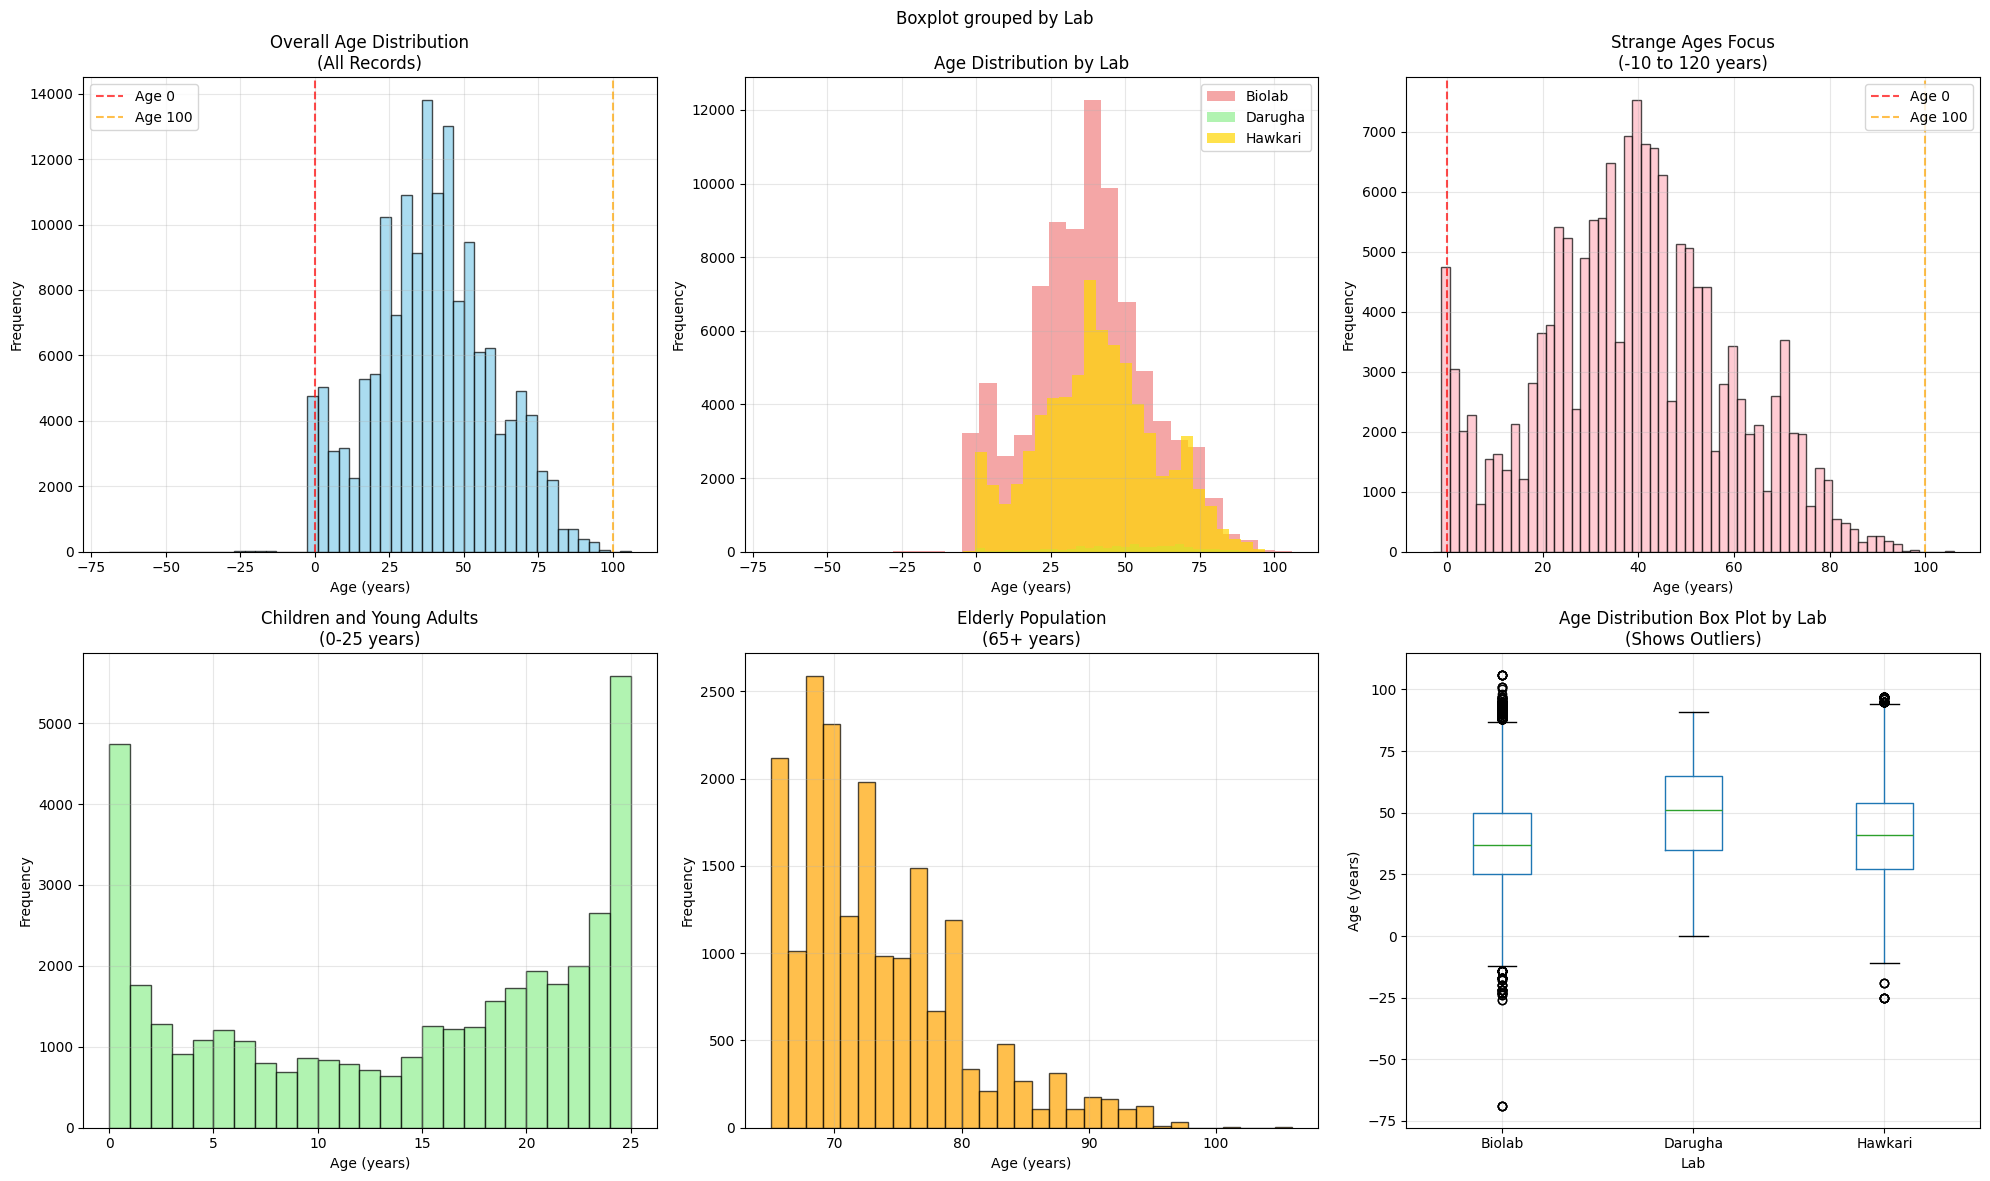


=== ADDITIONAL STRANGE INSIGHTS ===
Future sample dates (beyond 2025): 0
People born in 2023-2025: 5449

Age gap analysis:
Most common age: 0 years (4746 people)
Age with no records: Looking for gaps...
Ages with no records: [-68, -67, -66, -65, -64, -63, -62, -61, -60, -59]...

=== GENDER DISTRIBUTION BY AGE GROUPS ===
Children/Teens (0-18): 22,003 people
  Female: 11,784 (53.6%)
  Male: 10,219 (46.4%)
Young Adults (18-35): 40,884 people
  Female: 29,239 (71.5%)
  Male: 11,645 (28.5%)
Middle-aged (35-50): 49,060 people
  Female: 31,967 (65.2%)
  Male: 17,093 (34.8%)
Pre-elderly (50-65): 26,306 people
  Female: 15,651 (59.5%)
  Male: 10,655 (40.5%)
Elderly (65-100): 18,978 people
  Female: 10,879 (57.3%)
  Male: 8,099 (42.7%)
Very Elderly (100-150): 11 people
  Female: 11 (100.0%)


In [62]:
# Analyze strange age patterns in detail
print("=== DETAILED AGE ANALYSIS FOR STRANGE PATTERNS ===")

# Filter for records with calculated ages
age_data = df_combined[df_combined['Age'].notna()].copy()

print(f"Total records with calculated ages: {len(age_data):,}")
print(f"Records without ages: {df_combined['Age'].isna().sum():,}")

# 1. Negative ages (people born after sample date)
negative_ages = age_data[age_data['Age'] < 0]
print(f"\n1. NEGATIVE AGES (Born after sample date): {len(negative_ages):,} records")
if len(negative_ages) > 0:
    print("Sample negative age records:")
    print(negative_ages[['Sample ID', 'Patient Name', 'DOB', 'DOS', 'Age', 'Lab']].head(10))
    print(f"Age range: {negative_ages['Age'].min():.1f} to {negative_ages['Age'].max():.1f} years")

# 2. Zero ages (born same year as sample)
zero_ages = age_data[age_data['Age'] == 0]
print(f"\n2. ZERO AGES (Same birth and sample year): {len(zero_ages):,} records")
if len(zero_ages) > 0:
    print("Sample zero age records:")
    print(zero_ages[['Sample ID', 'Patient Name', 'DOB', 'DOS', 'Age', 'Lab']].head(5))

# 3. Very old ages (potentially data entry errors)
very_old = age_data[age_data['Age'] > 100]
print(f"\n3. VERY OLD AGES (>100 years): {len(very_old):,} records")
if len(very_old) > 0:
    print("Sample very old age records:")
    print(very_old[['Sample ID', 'Patient Name', 'DOB', 'DOS', 'Age', 'Lab']].head(10))
    print(f"Age range: {very_old['Age'].min():.1f} to {very_old['Age'].max():.1f} years")

# 4. Suspiciously round ages (might indicate approximations)
round_ages = age_data[age_data['Age'].isin([25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])]
print(f"\n4. SUSPICIOUSLY ROUND AGES (multiples of 5): {len(round_ages):,} records ({len(round_ages)/len(age_data)*100:.1f}%)")

# 5. People over 90 years old
very_elderly = age_data[age_data['Age'] > 90]
print(f"\n5. VERY ELDERLY (>90 years): {len(very_elderly):,} records")
if len(very_elderly) > 0:
    print("Sample very elderly records:")
    print(very_elderly[['Sample ID', 'Patient Name', 'DOB', 'DOS', 'Age', 'Lab']].head(5))

# 6. Newborns and infants (0-2 years)
newborns = age_data[(age_data['Age'] >= 0) & (age_data['Age'] <= 2)]
print(f"\n6. NEWBORNS AND INFANTS (0-2 years): {len(newborns):,} records")
if len(newborns) > 0:
    print("Sample newborn/infant records:")
    print(newborns[['Sample ID', 'Patient Name', 'DOB', 'DOS', 'Age', 'Lab']].head(5))

# 7. Age distribution by lab
print(f"\n7. AGE STATISTICS BY LAB:")
for lab in df_combined['Lab'].unique():
    lab_ages = age_data[age_data['Lab'] == lab]['Age']
    print(f"{lab}:")
    print(f"  Count: {len(lab_ages):,}")
    print(f"  Mean: {lab_ages.mean():.1f} years")
    print(f"  Median: {lab_ages.median():.1f} years")
    print(f"  Min: {lab_ages.min():.1f} years")
    print(f"  Max: {lab_ages.max():.1f} years")
    print(f"  Negative ages: {(lab_ages < 0).sum()}")

# Create comprehensive age histograms
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Age Distribution Analysis: Strange Patterns and Insights', fontsize=16, fontweight='bold')

# 1. Overall age distribution
axes[0, 0].hist(age_data['Age'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Overall Age Distribution\n(All Records)')
axes[0, 0].set_xlabel('Age (years)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axvline(0, color='red', linestyle='--', alpha=0.7, label='Age 0')
axes[0, 0].axvline(100, color='orange', linestyle='--', alpha=0.7, label='Age 100')
axes[0, 0].legend()

# 2. Age distribution by lab
for i, lab in enumerate(['Biolab', 'Darugha', 'Hawkari']):
    lab_ages = age_data[age_data['Lab'] == lab]['Age']
    if i == 0:
        axes[0, 1].hist(lab_ages, bins=30, alpha=0.7, label=lab, color='lightcoral')
    elif i == 1:
        axes[0, 1].hist(lab_ages, bins=30, alpha=0.7, label=lab, color='lightgreen')
    else:
        axes[0, 1].hist(lab_ages, bins=30, alpha=0.7, label=lab, color='gold')

axes[0, 1].set_title('Age Distribution by Lab')
axes[0, 1].set_xlabel('Age (years)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Focus on strange ages (-10 to 120 years)
strange_ages = age_data[(age_data['Age'] >= -10) & (age_data['Age'] <= 120)]
axes[0, 2].hist(strange_ages['Age'], bins=60, alpha=0.7, color='lightpink', edgecolor='black')
axes[0, 2].set_title('Strange Ages Focus\n(-10 to 120 years)')
axes[0, 2].set_xlabel('Age (years)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].grid(True, alpha=0.3)
axes[0, 2].axvline(0, color='red', linestyle='--', alpha=0.7, label='Age 0')
axes[0, 2].axvline(100, color='orange', linestyle='--', alpha=0.7, label='Age 100')
axes[0, 2].legend()

# 4. Age distribution for children and young adults (0-25 years)
young_ages = age_data[(age_data['Age'] >= 0) & (age_data['Age'] <= 25)]
axes[1, 0].hist(young_ages['Age'], bins=25, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Children and Young Adults\n(0-25 years)')
axes[1, 0].set_xlabel('Age (years)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)

# 5. Age distribution for elderly (65+ years)
elderly_ages = age_data[age_data['Age'] >= 65]
axes[1, 1].hist(elderly_ages['Age'], bins=30, alpha=0.7, color='orange', edgecolor='black')
axes[1, 1].set_title('Elderly Population\n(65+ years)')
axes[1, 1].set_xlabel('Age (years)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True, alpha=0.3)

# 6. Box plot showing age distribution and outliers
age_data.boxplot(column='Age', by='Lab', ax=axes[1, 2])
axes[1, 2].set_title('Age Distribution Box Plot by Lab\n(Shows Outliers)')
axes[1, 2].set_xlabel('Lab')
axes[1, 2].set_ylabel('Age (years)')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional insights
print(f"\n=== ADDITIONAL STRANGE INSIGHTS ===")

# Check for impossible dates (future dates)
current_year = 2025  # Based on the data, samples go up to 2025
future_samples = age_data[age_data['DOS'].str.contains('2026|2027|2028', na=False)]
print(f"Future sample dates (beyond 2025): {len(future_samples)}")

# Check for people born in very recent years but with tests
recent_births = age_data[age_data['DOB'].str.contains('2023|2024|2025', na=False)]
print(f"People born in 2023-2025: {len(recent_births)}")

# Age gaps analysis
print(f"\nAge gap analysis:")
print(f"Most common age: {age_data['Age'].mode().iloc[0]:.0f} years ({(age_data['Age'] == age_data['Age'].mode().iloc[0]).sum()} people)")
print(f"Age with no records: Looking for gaps...")

# Find age gaps
all_possible_ages = set(range(int(age_data['Age'].min()), int(age_data['Age'].max()) + 1))
actual_ages = set(age_data['Age'].round().astype(int))
missing_ages = sorted(all_possible_ages - actual_ages)
if missing_ages:
    print(f"Ages with no records: {missing_ages[:10]}..." if len(missing_ages) > 10 else f"Ages with no records: {missing_ages}")

# Gender distribution by age groups
print(f"\n=== GENDER DISTRIBUTION BY AGE GROUPS ===")
age_groups = [
    (0, 18, "Children/Teens"),
    (18, 35, "Young Adults"),
    (35, 50, "Middle-aged"),
    (50, 65, "Pre-elderly"),
    (65, 100, "Elderly"),
    (100, 150, "Very Elderly")
]

for min_age, max_age, group_name in age_groups:
    group_data = age_data[(age_data['Age'] >= min_age) & (age_data['Age'] < max_age)]
    if len(group_data) > 0:
        gender_dist = group_data['Gender'].value_counts()
        print(f"{group_name} ({min_age}-{max_age}): {len(group_data):,} people")
        for gender, count in gender_dist.items():
            print(f"  {gender}: {count:,} ({count/len(group_data)*100:.1f}%)")

***We are not focusing on Age so we keep the*** **outliers** ***for now***

In [67]:
df_combined.head()

,Sample ID,Patient Name,Gender,DOB,Test Name,Unit,Category,Result,DOS,Standard Test Name,Lab,Age
0,118,Xalil Ahmad Mhamad,Male,16/04/1959,Blood Sugar,mg/dl,Diabetes Test,95,16/04/2023,Blood Sugar,Biolab,64.0
1,126,Dyar Omar,Male,16/04/1986,Blood Sugar,mg/dl,Diabetes Test,86,16/04/2023,Blood Sugar,Biolab,37.0
2,132,Fatah Mhamad Qadr,Male,16/04/1970,Blood Sugar,mg/dl,Diabetes Test,84,16/04/2023,Blood Sugar,Biolab,53.0
3,177,Sesna Qubad Anwar,Female,17/04/1973,Blood Sugar,mg/dl,Diabetes Test,84,17/04/2023,Blood Sugar,Biolab,50.0
4,179,Bayan Abdulla Abdurahman,Female,17/04/1981,Blood Sugar,mg/dl,Diabetes Test,96,17/04/2023,Blood Sugar,Biolab,42.0


In [64]:
for test in df_combined['Standard Test Name'].unique():
    print(test)

Blood Sugar
HbA1c
Insulin
Fasting Blood Sugar
1-Hour Glucose
2-Hour Glucose
Typhoid IgG
Typhoid IgM
C-Reactive Protein
Helicobacter pylori Antibody
Brucella
Anti-Streptolysin O
Rheumatoid Arthritis
Rheumatoid Factor
Pregnancy Test (Beta-hCG)
CA 125
CA 19-9
Alpha-Fetoprotein
Carcinoembryonic Antigen
Prostate-Specific Antigen
CA 15-3
Immunoglobulin E
Triiodothyronine (T3)
Thyroxine (T4)
TSH
Free T3
Free T4
Anti-Thyroid Peroxidase Antibody
Anti-Thyroglobulin Antibody
Tissue Transglutaminase IgA
Tissue Transglutaminase IgG
Anti-Endomysial Antibody IgG
Anti-Endomysial Antibody IgA
Anti-Gliadin Antibody IgA
Anti-Gliadin Antibody IgG
Serum Amylase
Serum Lipase
Serum Cholesterol
Serum Triglycerides
Serum HDL Cholesterol
Serum LDL Cholesterol
Blood Urea Nitrogen
Serum Creatinine
Serum Uric Acid
Aspartate Aminotransferase (AST)
Alanine Aminotransferase (ALT)
Alkaline Phosphatase
Total Serum Bilirubin
Direct Bilirubin
Indirect Bilirubin
Serum Albumin
Total Serum Protein
S.Iron
Serum Ferritin
TIBC

In [66]:
# Show non-numeric Result values with their corresponding Standard Test Names
numeric_results = pd.to_numeric(df_combined['Result'], errors='coerce')
non_numeric_data = df_combined[numeric_results.isna()].copy()

# Get unique combinations of non-numeric results and their standard test names
non_numeric_combinations = non_numeric_data[['Result', 'Standard Test Name']].drop_duplicates()

# Sort by Standard Test Name for better organization
non_numeric_combinations = non_numeric_combinations.sort_values(['Standard Test Name', 'Result'])

print(f"Non-numeric Result values with their Standard Test Names:")
print(f"Total unique combinations: {len(non_numeric_combinations)}")
print("\n" + "="*80)

for _, row in non_numeric_combinations.iterrows():
    print(f"Standard Test: {row['Standard Test Name']}")
    print(f"Result Value: '{row['Result']}'")
    print("-" * 50)

# save it as a CSV file
non_numeric_combinations.to_csv('processed_data/non_numeric_results_analysis.csv', index=False)

Non-numeric Result values with their Standard Test Names:
Total unique combinations: 879

Standard Test: 1-Hour Glucose
Result Value: '.'
--------------------------------------------------
Standard Test: 2-Hour Glucose
Result Value: '.'
--------------------------------------------------
Standard Test: Albumin-to-Creatinine Ratio
Result Value: '> 1100'
--------------------------------------------------
Standard Test: Alpha-Fetoprotein
Result Value: '< 0.75'
--------------------------------------------------
Standard Test: Anti-Cardiolipin IgG
Result Value: '< 3'
--------------------------------------------------
Standard Test: Anti-Cyclic Citrullinated Peptide
Result Value: '< 0.1'
--------------------------------------------------
Standard Test: Anti-Cyclic Citrullinated Peptide
Result Value: '< 1'
--------------------------------------------------
Standard Test: Anti-Cyclic Citrullinated Peptide
Result Value: '< 1.0'
--------------------------------------------------
Standard Test: An

In [68]:
# Comprehensive Lab Result Categorization Function
# This function categorizes all lab results into "bn" (below normal), "n" (normal), "an" (above normal)

import pandas as pd
import numpy as np
import re

def create_outcome_column(df):
    """
    Create an Outcome column that categorizes lab test results based on:
    1. Non-numeric results: Use the mapping from processed_data/non_numeric_results_analysis.csv
    2. Numeric results: Apply medical reference ranges based on gender and test type
    """
    
    # Load the non-numeric results mapping
    try:
        non_numeric_mapping = pd.read_csv('processed_data/non_numeric_results_analysis.csv')
        # Create a dictionary for quick lookup
        mapping_dict = {}
        for _, row in non_numeric_mapping.iterrows():
            key = (row['Result'], row['Standard Test Name'])
            mapping_dict[key] = row['Outcome']
        print(f"Loaded {len(mapping_dict)} non-numeric result mappings")
    except FileNotFoundError:
        print("Warning: non_numeric_results_analysis.csv not found. Will only categorize numeric results.")
        mapping_dict = {}
    
    # Create a copy of the dataframe to work with
    df_result = df.copy()
    df_result['Outcome'] = 'n'  # Default to normal
    
    # Convert Result column to check if numeric
    numeric_results = pd.to_numeric(df_result['Result'], errors='coerce')
    is_numeric = numeric_results.notna()
    
    print(f"Processing {len(df_result)} total records:")
    print(f"- Numeric results: {is_numeric.sum():,} ({is_numeric.sum()/len(df_result)*100:.1f}%)")
    print(f"- Non-numeric results: {(~is_numeric).sum():,} ({(~is_numeric).sum()/len(df_result)*100:.1f}%)")
    
    # 1. Handle non-numeric results using the mapping
    non_numeric_count = 0
    for idx, row in df_result[~is_numeric].iterrows():
        key = (row['Result'], row['Standard Test Name'])
        if key in mapping_dict:
            df_result.loc[idx, 'Outcome'] = mapping_dict[key]
            non_numeric_count += 1
    
    print(f"Categorized {non_numeric_count} non-numeric results using mapping file")
    
    # 2. Handle numeric results with medical reference ranges
    numeric_categorized = 0
    
    for idx, row in df_result[is_numeric].iterrows():
        result_value = numeric_results.loc[idx]
        test_name = row['Standard Test Name']
        gender = row['Gender']
        age = row.get('Age', 30)  # Default age if not available
        
        # Get the outcome based on medical ranges
        outcome = categorize_numeric_result(result_value, test_name, gender, age)
        df_result.loc[idx, 'Outcome'] = outcome
        numeric_categorized += 1
    
    print(f"Categorized {numeric_categorized} numeric results using medical reference ranges")
    
    # Show final distribution
    print(f"\n=== FINAL OUTCOME DISTRIBUTION ===")
    outcome_counts = df_result['Outcome'].value_counts()
    for outcome, count in outcome_counts.items():
        percentage = count / len(df_result) * 100
        outcome_name = {'bn': 'Below Normal', 'n': 'Normal', 'an': 'Above Normal'}[outcome]
        print(f"{outcome_name} ({outcome}): {count:,} ({percentage:.1f}%)")
    
    return df_result

def categorize_numeric_result(value, test_name, gender, age=30):
    """
    Categorize a numeric lab result based on medical reference ranges
    Returns: 'bn' (below normal), 'n' (normal), 'an' (above normal)
    """
    
    # Define reference ranges by test name and gender
    # Format: test_name: {'M': (min, max), 'F': (min, max)}
    # If only one range, applies to both genders
    
    reference_ranges = {
        # Basic Chemistry Panel
        'Glucose': {'M': (70, 100), 'F': (70, 100)},
        'Blood Sugar': {'M': (70, 100), 'F': (70, 100)},
        'Fasting Blood Sugar': {'M': (70, 100), 'F': (70, 100)},
        'Random Blood Sugar': {'M': (70, 140), 'F': (70, 140)},
        '1-Hour Glucose': {'M': (0, 180), 'F': (0, 180)},
        '2-Hour Glucose': {'M': (0, 140), 'F': (0, 140)},
        'HbA1c': {'M': (4.0, 5.6), 'F': (4.0, 5.6)},
        
        # Kidney Function
        'Serum Creatinine': {'M': (0.7, 1.3), 'F': (0.6, 1.1)},
        'Blood Urea Nitrogen': {'M': (6, 24), 'F': (6, 21)},
        'Urine Albumin': {'M': (0, 30), 'F': (0, 30)},
        
        # Liver Function
        'Alanine Aminotransferase (ALT)': {'M': (7, 56), 'F': (7, 56)},
        'Aspartate Aminotransferase (AST)': {'M': (10, 40), 'F': (10, 40)},
        'Alkaline Phosphatase': {'M': (44, 147), 'F': (44, 147)},
        'Gamma-Glutamyl Transferase': {'M': (9, 48), 'F': (9, 32)},
        'Total Bilirubin': {'M': (0.3, 1.2), 'F': (0.3, 1.2)},
        'Direct Bilirubin': {'M': (0.0, 0.3), 'F': (0.0, 0.3)},
        'Albumin': {'M': (3.5, 5.0), 'F': (3.5, 5.0)},
        
        # Lipid Profile
        'Total Cholesterol': {'M': (0, 200), 'F': (0, 200)},
        'Serum LDL Cholesterol': {'M': (0, 100), 'F': (0, 100)},
        'Serum HDL Cholesterol': {'M': (40, 100), 'F': (50, 100)},
        'Serum Triglycerides': {'M': (0, 150), 'F': (0, 150)},
        'Triglycerides': {'M': (0, 150), 'F': (0, 150)},
        
        # Complete Blood Count
        'Hemoglobin': {'M': (13.8, 17.2), 'F': (12.1, 15.1)},
        'Packed Cell Volume': {'M': (41, 50), 'F': (36, 44)},
        'White Blood Cell Count': {'M': (3.5, 10.5), 'F': (3.5, 10.5)},
        'Platelet Count': {'M': (150, 400), 'F': (150, 400)},
        'Red Blood Cell Count': {'M': (4.7, 6.1), 'F': (4.2, 5.4)},
        'Mean Corpuscular Volume': {'M': (80, 100), 'F': (80, 100)},
        'Mean Corpuscular Hemoglobin': {'M': (27, 32), 'F': (27, 32)},
        'Mean Corpuscular Hemoglobin Concentration': {'M': (32, 36), 'F': (32, 36)},
        
        # Thyroid Function
        'TSH': {'M': (0.27, 4.2), 'F': (0.27, 4.2)},
        'Free T4': {'M': (12, 22), 'F': (12, 22)},
        'Thyroxine (T4)': {'M': (5, 12), 'F': (5, 12)},
        'Free T3': {'M': (3.1, 6.8), 'F': (3.1, 6.8)},
        'Triiodothyronine (T3)': {'M': (1.3, 3.1), 'F': (1.3, 3.1)},
        'Anti-Thyroid Peroxidase Antibody': {'M': (0, 34), 'F': (0, 34)},
        'Anti-Thyroglobulin Antibody': {'M': (0, 115), 'F': (0, 115)},
        'Thyroglobulin': {'M': (1.4, 78), 'F': (1.4, 78)},
        
        # Cardiac Markers
        'High-Sensitivity Troponin T': {'M': (0, 14), 'F': (0, 14)},
        'Creatine Phosphokinase': {'M': (39, 308), 'F': (26, 192)},
        'Lactate Dehydrogenase': {'M': (122, 222), 'F': (122, 222)},
        'N-Terminal Pro-B-Type Natriuretic Peptide': {'M': (0, 125), 'F': (0, 125)},
        
        # Hormones
        'Testosterone': {'M': (8.64, 29), 'F': (0.7, 3.1)},
        'Estradiol (E2)': {'M': (7.6, 42.6), 'F': (12.5, 166)},  # Varies by cycle
        'Progesterone': {'M': (0.2, 1.4), 'F': (0.2, 25)},  # Varies by cycle
        'Prolactin': {'M': (4.04, 15.2), 'F': (4.79, 23.3)},
        'Follicle-Stimulating Hormone': {'M': (1.5, 12.4), 'F': (3.5, 12.5)},  # Varies by cycle
        'Luteinizing Hormone': {'M': (1.7, 8.6), 'F': (2.4, 12.6)},  # Varies by cycle
        'Cortisol': {'M': (6.2, 19.4), 'F': (6.2, 19.4)},
        'Parathyroid Hormone': {'M': (15, 65), 'F': (15, 65)},
        
        # Vitamins and Minerals
        'Vitamin D3': {'M': (20, 50), 'F': (20, 50)},
        'Vitamin B12': {'M': (200, 900), 'F': (200, 900)},
        'Serum Ferritin': {'M': (12, 300), 'F': (12, 150)},
        'Iron': {'M': (80, 180), 'F': (60, 170)},
        'Total Iron Binding Capacity': {'M': (240, 450), 'F': (240, 450)},
        'Transferrin Saturation': {'M': (20, 50), 'F': (20, 50)},
        
        # Electrolytes
        'Sodium': {'M': (136, 145), 'F': (136, 145)},
        'Potassium': {'M': (3.5, 5.1), 'F': (3.5, 5.1)},
        'Chloride': {'M': (98, 107), 'F': (98, 107)},
        'Carbon Dioxide': {'M': (22, 29), 'F': (22, 29)},
        'Calcium': {'M': (8.5, 10.5), 'F': (8.5, 10.5)},
        'Phosphorus': {'M': (2.5, 4.5), 'F': (2.5, 4.5)},
        'Magnesium': {'M': (1.7, 2.2), 'F': (1.7, 2.2)},
        
        # Coagulation
        'Prothrombin Time': {'M': (9.5, 13.8), 'F': (9.5, 13.8)},
        'International Normalized Ratio': {'M': (0.8, 1.1), 'F': (0.8, 1.1)},
        'Activated Partial Thromboplastin Time': {'M': (30, 40), 'F': (30, 40)},
        'Bleeding Time': {'M': (2, 8), 'F': (2, 8)},  # in minutes
        'Clotting Time': {'M': (5, 11), 'F': (5, 11)},  # in minutes
        
        # Pregnancy Related
        'Beta-hCG Titer': {'M': (0, 5), 'F': (0, 5)},  # Non-pregnant
        'Pregnancy Test (Beta-hCG)': {'M': (0, 5), 'F': (0, 5)},  # Non-pregnant
        'Alpha-Fetoprotein': {'M': (0, 8.5), 'F': (0, 8.5)},  # Non-pregnant
        
        # Tumor Markers
        'Prostate-Specific Antigen': {'M': (0, 4), 'F': (0, 4)},
        'Carcinoembryonic Antigen': {'M': (0, 3), 'F': (0, 3)},
        'CA 19-9': {'M': (0, 37), 'F': (0, 37)},
        
        # Immunology
        'C-Reactive Protein': {'M': (0, 10), 'F': (0, 10)},
        'Rheumatoid Factor': {'M': (0, 15), 'F': (0, 15)},
        'Rheumatoid Factor Titer': {'M': (0, 15), 'F': (0, 15)},
        'Anti-Cyclic Citrullinated Peptide': {'M': (0, 20), 'F': (0, 20)},
        'Immunoglobulin E': {'M': (0, 100), 'F': (0, 100)},
        
        # Special Tests
        'D-Dimer': {'M': (0, 0.5), 'F': (0, 0.5)},
        'Albumin-to-Creatinine Ratio': {'M': (0, 30), 'F': (0, 30)},
        'Protein C Assay': {'M': (70, 140), 'F': (70, 140)},
    }
    
    # Handle special cases for percentage values
    if test_name == 'Packed Cell Volume' and isinstance(value, str) and '%' in str(value):
        try:
            value = float(str(value).replace('%', ''))
        except:
            return 'n'
    
    # Get gender-specific reference range
    if test_name in reference_ranges:
        ranges = reference_ranges[test_name]
        if gender in ranges:
            min_val, max_val = ranges[gender]
        else:
            # Use male range as default if gender not specified
            min_val, max_val = ranges.get('M', ranges.get('F', (0, float('inf'))))
        
        if value < min_val:
            return 'bn'
        elif value > max_val:
            return 'an'
        else:
            return 'n'
    
    # For unknown tests, use general heuristics
    else:
        # Very common ranges for general categorization
        if value < 0:
            return 'bn'  # Negative values usually abnormal
        elif value > 1000:
            return 'an'  # Very high values usually abnormal
        else:
            return 'n'   # Default to normal for unknown tests
    
print("Lab result categorization functions defined successfully!")
print("Ready to create Outcome column for df_combined...")

Lab result categorization functions defined successfully!
Ready to create Outcome column for df_combined...


In [69]:
# Apply the categorization function to create the Outcome column
print("Starting categorization of all lab results...")
print(f"Original dataframe shape: {df_combined.shape}")

# Apply the categorization function
df_combined_with_outcome = create_outcome_column(df_combined)

print(f"Updated dataframe shape: {df_combined_with_outcome.shape}")
print("\n=== OUTCOME COLUMN CREATED SUCCESSFULLY ===")

# Show sample results
print("\n=== SAMPLE RESULTS WITH OUTCOMES ===")
sample_cols = ['Sample ID', 'Standard Test Name', 'Result', 'Unit', 'Gender', 'Age', 'Outcome']
print(df_combined_with_outcome[sample_cols].head(10))

# Show some examples by outcome type
print("\n=== EXAMPLES BY OUTCOME TYPE ===")

# Below Normal examples
bn_examples = df_combined_with_outcome[df_combined_with_outcome['Outcome'] == 'bn'][sample_cols].head(5)
print(f"\nBELOW NORMAL (bn) - {len(df_combined_with_outcome[df_combined_with_outcome['Outcome'] == 'bn'])} records:")
for i, (_, row) in enumerate(bn_examples.iterrows(), 1):
    print(f"{i}. {row['Standard Test Name']}: {row['Result']} ({row['Unit']}) -> {row['Outcome']} [{row['Gender']}, Age: {row['Age']}]")

# Normal examples
n_examples = df_combined_with_outcome[df_combined_with_outcome['Outcome'] == 'n'][sample_cols].head(5)
print(f"\nNORMAL (n) - {len(df_combined_with_outcome[df_combined_with_outcome['Outcome'] == 'n'])} records:")
for i, (_, row) in enumerate(n_examples.iterrows(), 1):
    print(f"{i}. {row['Standard Test Name']}: {row['Result']} ({row['Unit']}) -> {row['Outcome']} [{row['Gender']}, Age: {row['Age']}]")

# Above Normal examples
an_examples = df_combined_with_outcome[df_combined_with_outcome['Outcome'] == 'an'][sample_cols].head(5)
print(f"\nABOVE NORMAL (an) - {len(df_combined_with_outcome[df_combined_with_outcome['Outcome'] == 'an'])} records:")
for i, (_, row) in enumerate(an_examples.iterrows(), 1):
    print(f"{i}. {row['Standard Test Name']}: {row['Result']} ({row['Unit']}) -> {row['Outcome']} [{row['Gender']}, Age: {row['Age']}]")

# Update the main dataframe
df_combined = df_combined_with_outcome.copy()
print(f"\n=== DATAFRAME UPDATED ===")
print(f"df_combined now includes the 'Outcome' column with {len(df_combined)} records")

Starting categorization of all lab results...
Original dataframe shape: (157361, 12)
Loaded 879 non-numeric result mappings
Processing 157361 total records:
- Numeric results: 141,109 (89.7%)
- Non-numeric results: 16,252 (10.3%)
Categorized 16252 non-numeric results using mapping file
Categorized 141109 numeric results using medical reference ranges

=== FINAL OUTCOME DISTRIBUTION ===
Normal (n): 115,365 (73.3%)
Above Normal (an): 28,006 (17.8%)
Below Normal (bn): 13,990 (8.9%)
Updated dataframe shape: (157361, 13)

=== OUTCOME COLUMN CREATED SUCCESSFULLY ===

=== SAMPLE RESULTS WITH OUTCOMES ===
   Sample ID Standard Test Name Result   Unit  Gender   Age Outcome
0        118        Blood Sugar     95  mg/dl    Male  64.0       n
1        126        Blood Sugar     86  mg/dl    Male  37.0       n
2        132        Blood Sugar     84  mg/dl    Male  53.0       n
3        177        Blood Sugar     84  mg/dl  Female  50.0       n
4        179        Blood Sugar     96  mg/dl  Female  

In [70]:
# Verification of the Outcome column creation
print("=== OUTCOME COLUMN VERIFICATION ===")
print(f"Total records: {len(df_combined):,}")
print(f"Records with Outcome column: {df_combined['Outcome'].notna().sum():,}")

# Show outcome distribution
outcome_distribution = df_combined['Outcome'].value_counts()
print(f"\n=== OUTCOME DISTRIBUTION ===")
for outcome, count in outcome_distribution.items():
    percentage = count / len(df_combined) * 100
    outcome_name = {'bn': 'Below Normal', 'n': 'Normal', 'an': 'Above Normal'}[outcome]
    print(f"{outcome_name} ({outcome}): {count:,} ({percentage:.1f}%)")

# Show distribution by lab
print(f"\n=== OUTCOME DISTRIBUTION BY LAB ===")
outcome_by_lab = df_combined.groupby(['Lab', 'Outcome']).size().unstack(fill_value=0)
print(outcome_by_lab)

# Show percentage by lab
print(f"\n=== PERCENTAGE DISTRIBUTION BY LAB ===")
outcome_by_lab_pct = df_combined.groupby(['Lab', 'Outcome']).size().unstack(fill_value=0)
outcome_by_lab_pct_normalized = outcome_by_lab_pct.div(outcome_by_lab_pct.sum(axis=1), axis=0) * 100
print(outcome_by_lab_pct_normalized.round(1))

# Show some examples of each category
print(f"\n=== SAMPLE CATEGORIZATIONS ===")

# Numeric examples
numeric_results = pd.to_numeric(df_combined['Result'], errors='coerce')
numeric_data = df_combined[numeric_results.notna()]

print("Numeric Result Examples:")
for outcome in ['bn', 'n', 'an']:
    examples = numeric_data[numeric_data['Outcome'] == outcome].head(3)
    outcome_name = {'bn': 'Below Normal', 'n': 'Normal', 'an': 'Above Normal'}[outcome]
    print(f"\n{outcome_name} ({outcome}):")
    for i, (_, row) in enumerate(examples.iterrows(), 1):
        print(f"  {i}. {row['Standard Test Name']}: {row['Result']} {row['Unit']} [{row['Gender']}]")

# Non-numeric examples  
non_numeric_data = df_combined[numeric_results.isna()]
print("\nNon-Numeric Result Examples:")
for outcome in ['bn', 'n', 'an']:
    examples = non_numeric_data[non_numeric_data['Outcome'] == outcome].head(3)
    outcome_name = {'bn': 'Below Normal', 'n': 'Normal', 'an': 'Above Normal'}[outcome]
    print(f"\n{outcome_name} ({outcome}):")
    for i, (_, row) in enumerate(examples.iterrows(), 1):
        print(f"  {i}. {row['Standard Test Name']}: '{row['Result']}' [{row['Gender']}]")

print(f"\n=== CATEGORIZATION COMPLETE ===")
print(f"Successfully categorized {len(df_combined):,} lab test results!")
print("The 'Outcome' column is now available for analysis.")

=== OUTCOME COLUMN VERIFICATION ===
Total records: 157,361
Records with Outcome column: 157,361

=== OUTCOME DISTRIBUTION ===
Normal (n): 115,365 (73.3%)
Above Normal (an): 28,006 (17.8%)
Below Normal (bn): 13,990 (8.9%)

=== OUTCOME DISTRIBUTION BY LAB ===
Outcome     an    bn      n
Lab                        
Biolab   16693  8715  58771
Darugha    564    93   2166
Hawkari  10749  5182  54428

=== PERCENTAGE DISTRIBUTION BY LAB ===
Outcome    an    bn     n
Lab                      
Biolab   19.8  10.4  69.8
Darugha  20.0   3.3  76.7
Hawkari  15.3   7.4  77.4

=== SAMPLE CATEGORIZATIONS ===
Numeric Result Examples:

Below Normal (bn):
  1. Blood Sugar: 67 mg/dl [Male]
  2. Blood Sugar: 68 mg/dl [Female]
  3. Blood Sugar: 9.08 mg/dl [Female]

Normal (n):
  1. Blood Sugar: 95 mg/dl [Male]
  2. Blood Sugar: 86 mg/dl [Male]
  3. Blood Sugar: 84 mg/dl [Male]

Above Normal (an):
  1. Blood Sugar: 157 mg/dl [Female]
  2. Blood Sugar: 106 mg/dl [Female]
  3. Blood Sugar: 101 mg/dl [Female]



In [71]:
# Save the updated dataframe with Outcome column
output_filename = 'combined_lab_testsV5.csv'
df_combined.to_csv(output_filename, index=False)
print(f"✅ Saved complete dataset with Outcome column to: {output_filename}")
print(f"📊 File contains {len(df_combined):,} records with {len(df_combined.columns)} columns")
print(f"📋 Columns: {', '.join(df_combined.columns.tolist())}")

# Show final summary
print(f"\n=== FINAL SUMMARY ===")
print(f"🔬 Total lab test results: {len(df_combined):,}")
print(f"🏥 Labs included: {', '.join(df_combined['Lab'].unique())}")
print(f"👥 Genders: {', '.join(df_combined['Gender'].unique())}")
print(f"🧪 Unique test types: {df_combined['Standard Test Name'].nunique():,}")
print(f"📈 Outcome distribution:")

outcome_counts = df_combined['Outcome'].value_counts()
for outcome, count in outcome_counts.items():
    percentage = count / len(df_combined) * 100
    outcome_name = {'bn': 'Below Normal', 'n': 'Normal', 'an': 'Above Normal'}[outcome]
    emoji = {'bn': '📉', 'n': '✅', 'an': '📈'}[outcome]
    print(f"   {emoji} {outcome_name} ({outcome}): {count:,} ({percentage:.1f}%)")

print(f"\n🎯 The dataset is now ready for health data analysis!")
print(f"📁 File saved as: {output_filename}")

✅ Saved complete dataset with Outcome column to: combined_lab_testsV5.csv
📊 File contains 157,361 records with 13 columns
📋 Columns: Sample ID, Patient Name, Gender, DOB, Test Name, Unit, Category, Result, DOS, Standard Test Name, Lab, Age, Outcome

=== FINAL SUMMARY ===
🔬 Total lab test results: 157,361
🏥 Labs included: Biolab, Darugha, Hawkari
👥 Genders: Male, Female
🧪 Unique test types: 216
📈 Outcome distribution:
   ✅ Normal (n): 115,365 (73.3%)
   📈 Above Normal (an): 28,006 (17.8%)
   📉 Below Normal (bn): 13,990 (8.9%)

🎯 The dataset is now ready for health data analysis!
📁 File saved as: combined_lab_testsV5.csv


In [72]:
df_combined.head()

,Sample ID,Patient Name,Gender,DOB,Test Name,Unit,Category,Result,DOS,Standard Test Name,Lab,Age,Outcome
0,118,Xalil Ahmad Mhamad,Male,16/04/1959,Blood Sugar,mg/dl,Diabetes Test,95,16/04/2023,Blood Sugar,Biolab,64.0,n
1,126,Dyar Omar,Male,16/04/1986,Blood Sugar,mg/dl,Diabetes Test,86,16/04/2023,Blood Sugar,Biolab,37.0,n
2,132,Fatah Mhamad Qadr,Male,16/04/1970,Blood Sugar,mg/dl,Diabetes Test,84,16/04/2023,Blood Sugar,Biolab,53.0,n
3,177,Sesna Qubad Anwar,Female,17/04/1973,Blood Sugar,mg/dl,Diabetes Test,84,17/04/2023,Blood Sugar,Biolab,50.0,n
4,179,Bayan Abdulla Abdurahman,Female,17/04/1981,Blood Sugar,mg/dl,Diabetes Test,96,17/04/2023,Blood Sugar,Biolab,42.0,n


In [4]:
df_combined = pd.read_csv('combined_lab_testsV5.csv')

**NAME MATCHING**

In [5]:
from fuzzywuzzy import fuzz
from collections import defaultdict
# Lets optimize more, adding one more constraint
# their first name should match exactly or mismatch only on one character.

def find_similar_names_v2(df, similarity_threshold=65):
    """
    Find similar patient names using fuzzy matching with first name constraint
    Returns groups of similar names that share the same LAB, DOB, and have similar first names
    """
    
    def first_names_similar(name1, name2):
        """Check if first names match exactly or have only one character difference"""
        first1 = name1.split()[0].lower()
        first2 = name2.split()[0].lower()
        
        # Exact match
        if first1 == first2:
            return True
        
        # Check if only one character difference
        if abs(len(first1) - len(first2)) > 1:
            return False
        
        # Count character differences
        differences = 0
        min_len = min(len(first1), len(first2))
        max_len = max(len(first1), len(first2))
        

        for i in range(min_len):
            if first1[i] != first2[i]:
                differences += 1
        
        # Add difference for length mismatch
        differences += max_len - min_len
        
        return differences <= 1
    
    # Group by LAB and DOB first to reduce comparison space
    grouped = df.groupby(['Lab', 'DOB'])
    similar_groups = []
    
    for (lab, dob), group in grouped:
        unique_names = group['Patient Name'].unique()
        
        if len(unique_names) > 1:
            processed_names = set()
            
            for i, name1 in enumerate(unique_names):
                if name1 in processed_names:
                    continue
                    
                current_group = [name1]
                processed_names.add(name1)
                
                for name2 in unique_names[i+1:]:
                    if name2 not in processed_names:
                        # Check both fuzzy similarity and first name constraint
                        similarity = fuzz.ratio(name1.lower(), name2.lower())
                        if (similarity >= similarity_threshold and 
                            first_names_similar(name1, name2)):
                            current_group.append(name2)
                            processed_names.add(name2)
                
                if len(current_group) > 1:
                    similar_groups.append({
                        'lab': lab,
                        'dob': dob,
                        'similar_names': current_group,
                        'count': len(current_group)
                    })
    
    return similar_groups

# Test the improved function
similar_name_groups_v2 = find_similar_names_v2(df_combined, 85)

print(f"Found {len(similar_name_groups_v2)} groups of similar names with first name constraint")
print("\nFirst 20 groups:")
for i, group in enumerate(similar_name_groups_v2[:20]):
    print(f"\nGroup {i+1}:")
    print(f"  Lab: {group['lab']}")
    print(f"  DOB: {group['dob']}")
    print(f"  Similar names ({group['count']}): {group['similar_names']}")

d:\Research\mhmd_mawlawi\health_data\.venv\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Found 39 groups of similar names with first name constraint

First 20 groups:

Group 1:
  Lab: Biolab
  DOB: 1/6/2022
  Similar names (2): ['Kyan Ranj Jamal', 'Kian Ranj Jamal']

Group 2:
  Lab: Biolab
  DOB: 1/9/2022
  Similar names (2): ['Kyana Barham Latef', 'Dyana Barham Latef']

Group 3:
  Lab: Biolab
  DOB: 13/06/1962
  Similar names (2): ['Xanm Hamaamin Hamasalh', 'Xanm Hama Amin Hamasalih']

Group 4:
  Lab: Biolab
  DOB: 14/05/1993
  Similar names (2): ['Avin Taha Mhamad', 'Avin Taha Muhammed']

Group 5:
  Lab: Biolab
  DOB: 15/07/2009
  Similar names (2): ['Inas Hoshmand', 'Enas Hoshmand']

Group 6:
  Lab: Biolab
  DOB: 20/04/1957
  Similar names (2): ['Taiba Mahmud Maulud', 'Taiba Mahmud maulud']

Group 7:
  Lab: Biolab
  DOB: 20/04/1987
  Similar names (2): ['Hawsar Kamal Mhamad', 'Hawsar Kam,al Mhamad']

Group 8:
  Lab: Biolab
  DOB: 20/08/1991
  Similar names (2): ['Avan Abdulaziz Fatah', 'Avan Abdulazizi Fatah']

Group 9:
  Lab: Biolab
  DOB: 20/09/1982
  Similar names (2

In [6]:
fine_tuning = [95,90,85, 80, 75, 70, 65, 60]

for i in fine_tuning:
    similar_name_groups = find_similar_names_v2(df_combined, i)
    print(f"Found {len(similar_name_groups)} groups of similar names with threshold {i}")

Found 20 groups of similar names with threshold 95
Found 35 groups of similar names with threshold 90
Found 39 groups of similar names with threshold 85
Found 46 groups of similar names with threshold 80
Found 51 groups of similar names with threshold 75
Found 62 groups of similar names with threshold 70
Found 76 groups of similar names with threshold 65
Found 90 groups of similar names with threshold 60


In [7]:
# Test the improved function
similar_name_groups_v2 = find_similar_names_v2(df_combined, 70)

print(f"Found {len(similar_name_groups_v2)} groups of similar names with first name constraint")
print("\nGroups for 70% threshold:")
for i, group in enumerate(similar_name_groups_v2):
    print(f"\nGroup {i+1}:")
    print(f"  Lab: {group['lab']}")
    print(f"  DOB: {group['dob']}")
    print(f"  Similar names ({group['count']}): {group['similar_names']}")

Found 62 groups of similar names with first name constraint

Groups for 70% threshold:

Group 1:
  Lab: Biolab
  DOB: 1/11/2024
  Similar names (2): ['Ela Arian Ali', 'Ela Aryan']

Group 2:
  Lab: Biolab
  DOB: 1/12/2024
  Similar names (2): ['Shahan Shkar', 'Shahan Shkar Xalid']

Group 3:
  Lab: Biolab
  DOB: 1/6/2022
  Similar names (2): ['Kyan Ranj Jamal', 'Kian Ranj Jamal']

Group 4:
  Lab: Biolab
  DOB: 1/9/2022
  Similar names (2): ['Kyana Barham Latef', 'Dyana Barham Latef']

Group 5:
  Lab: Biolab
  DOB: 10/7/1971
  Similar names (2): ['Muhamad Abdulla', 'Muhamad Abdulla Hasan']

Group 6:
  Lab: Biolab
  DOB: 13/01/1967
  Similar names (2): ['Ali Mhamad Saed', 'Ali Muhammed saheed']

Group 7:
  Lab: Biolab
  DOB: 13/06/1962
  Similar names (2): ['Xanm Hamaamin Hamasalh', 'Xanm Hama Amin Hamasalih']

Group 8:
  Lab: Biolab
  DOB: 14/05/1993
  Similar names (2): ['Avin Taha Mhamad', 'Avin Taha Muhammed']

Group 9:
  Lab: Biolab
  DOB: 15/07/2009
  Similar names (2): ['Inas Hoshma

In [8]:
specials=[
          ['Inas Hoshmand', 'Enas Hoshmand'],
          ['Banan Ali', 'Bayan Aziz Ali'],
          ['kovan mahamad amanj', 'Rovan Muhamad Amanj'],
          ['Aiman Rebwar Muhammed', 'Aiman Rebwar Omar'],
          ['Dlin Aso Omar', 'Alin Aso Omar'],
          ['Muhamad Kosar Ahmad', 'Muhamad Sleman Muhamad'],
          ['Shirin Amin Mhamad', 'Shirin Abdulrahman Ahmad'],
          ['Shirin mhamad  Pirwais', 'Shirin Mhamad Rostam'],
          ['Shahla karim Mhamad', 'Shahla Mhamad Axa'],
          ['Shoxan Mhamad Faraj', 'shoxan Mhamad Amin'],
          ['naxshin tahir ahmad', 'Naxshin Salh Hama Murad'],
          ['Shirin faraj mhamad', 'shirin rahman ahmad'],
          ['swmaya jalal abdwlla', 'swmaya mahmud abdwlla'],
          ]

# lets go with 70 percent
# rename the second matching name with the first one for threshold of 70 in the df and do not do it when the name is one of the specials

similar_name_groups = find_similar_names_v2(df_combined, 70)
# Create a set of special name pairs for faster lookup
special_pairs = set()
for pair in specials:
    special_pairs.add((pair[0].lower().strip(), pair[1].lower().strip()))
    special_pairs.add((pair[1].lower().strip(), pair[0].lower().strip()))  # Add reverse pair

print(f"Number of Unique names in the df BEFORE the renaming: {df_combined['Patient Name'].nunique()}")

for group in similar_name_groups:
    if len(group['similar_names']) > 1:
        # Check if this is a special case that should not be renamed
        name1 = group['similar_names'][0].lower().strip()
        name2 = group['similar_names'][1].lower().strip()
        
        if (name1, name2) not in special_pairs:
            # Only rename if it's not a special case
            df_combined.loc[df_combined['Patient Name'] == group['similar_names'][1], 'Patient Name'] = group['similar_names'][0]

print(f"Number of Unique names in the df AFTER the renaming: {df_combined['Patient Name'].nunique()}")

Number of Unique names in the df BEFORE the renaming: 33366
Number of Unique names in the df AFTER the renaming: 33317


In [9]:
# Task 1: Analyze test frequencies and remove tests with small frequencies

print("=== ANALYZING TEST FREQUENCIES ===")
print(f"Total records before filtering: {len(df_combined):,}")

# Get test frequency distribution
test_frequency = df_combined['Standard Test Name'].value_counts()
print(f"Total unique tests: {len(test_frequency)}")

# Show distribution of test frequencies
print(f"\n=== TEST FREQUENCY DISTRIBUTION ===")
print(f"Tests with 1-10 records: {(test_frequency <= 10).sum()}")
print(f"Tests with 11-50 records: {((test_frequency > 10) & (test_frequency <= 50)).sum()}")
print(f"Tests with 51-100 records: {((test_frequency > 50) & (test_frequency <= 100)).sum()}")
print(f"Tests with 101-500 records: {((test_frequency > 100) & (test_frequency <= 500)).sum()}")
print(f"Tests with 501-1000 records: {((test_frequency > 500) & (test_frequency <= 1000)).sum()}")
print(f"Tests with 1001-3000 records: {((test_frequency > 1000) & (test_frequency <= 3000)).sum()}")
print(f"Tests with >3000 records: {(test_frequency > 3000).sum()}")

# Define threshold for removing low-frequency tests
min_frequency_threshold = 1000
low_frequency_tests = test_frequency[test_frequency < min_frequency_threshold].index.tolist()

print(f"\n=== TESTS TO REMOVE (less than {min_frequency_threshold} records) ===")
print(f"Number of tests to remove: {len(low_frequency_tests)}")
print(f"Records to be removed: {test_frequency[test_frequency < min_frequency_threshold].sum():,}")

# Show the tests that will be removed
print(f"\nTests being removed:")
for i, test in enumerate(low_frequency_tests[:20], 1):
    count = test_frequency[test]
    print(f"{i:2d}. {test}: {count} records")
if len(low_frequency_tests) > 20:
    print(f"... and {len(low_frequency_tests) - 20} more tests")

# Remove low-frequency tests
df_filtered = df_combined[~df_combined['Standard Test Name'].isin(low_frequency_tests)].copy()

print(f"\n=== RESULTS AFTER FILTERING ===")
print(f"Records before filtering: {len(df_combined):,}")
print(f"Records after filtering: {len(df_filtered):,}")
print(f"Records removed: {len(df_combined) - len(df_filtered):,}")
print(f"Percentage of records retained: {len(df_filtered)/len(df_combined)*100:.1f}%")

print(f"\nTests before filtering: {df_combined['Standard Test Name'].nunique()}")
print(f"Tests after filtering: {df_filtered['Standard Test Name'].nunique()}")
print(f"Tests removed: {df_combined['Standard Test Name'].nunique() - df_filtered['Standard Test Name'].nunique()}")

# Show the most common tests after filtering
print(f"\n=== TOP 20 MOST COMMON TESTS AFTER FILTERING ===")
filtered_test_freq = df_filtered['Standard Test Name'].value_counts()
for i, (test, count) in enumerate(filtered_test_freq.head(20).items(), 1):
    percentage = count / len(df_filtered) * 100
    print(f"{i:2d}. {test}: {count:,} ({percentage:.1f}%)")

# Update the main dataframe
df_combined = df_filtered.copy()
print(f"\n✅ Dataset filtered successfully!")
print(f"📊 New dataset size: {len(df_combined):,} records with {df_combined['Standard Test Name'].nunique()} unique tests")

=== ANALYZING TEST FREQUENCIES ===
Total records before filtering: 157,361
Total unique tests: 216

=== TEST FREQUENCY DISTRIBUTION ===
Tests with 1-10 records: 76
Tests with 11-50 records: 34
Tests with 51-100 records: 19
Tests with 101-500 records: 40
Tests with 501-1000 records: 5
Tests with 1001-3000 records: 25
Tests with >3000 records: 17

=== TESTS TO REMOVE (less than 1000 records) ===
Number of tests to remove: 174
Records to be removed: 17,519

Tests being removed:
 1. Luteinizing Hormone: 849 records
 2. Testosterone: 839 records
 3. Prostate-Specific Antigen: 835 records
 4. HDL Cholesterol: 717 records
 5. Fecal Calprotectein Titer: 555 records
 6. Serum Albumin: 488 records
 7. Prothrombin Time: 487 records
 8. International Normalized Ratio: 482 records
 9. Serum Uric Acid: 469 records
10. C-Reactive Protein: 467 records
11. Thyroxine (T4): 445 records
12. Helicobacter pylori Antigen: 436 records
13. D-Dimer: 421 records
14. S.Zinc: 418 records
15. Bleeding Time: 384 rec

In [10]:
from itertools import combinations

# bring back all the patients that are tested for v tests.
# with more than 300 patients

unique_tests = df_combined['Standard Test Name'].unique()
print(f"Total unique tests after filtering: {len(unique_tests)}")

limit = 1000
v = 2

# Create a pivot table with patients as rows and tests as columns
# Count how many times each patient had each test (binary: 1 if tested, 0 if not)
df_pivot = df_combined.groupby(['Patient Name', 'Standard Test Name']).size().unstack(fill_value=0)
# Convert to binary (1 if patient had the test, 0 if not)
df_pivot = (df_pivot > 0).astype(int)

print(f"Pivot table shape: {df_pivot.shape}")
print(f"Patients: {len(df_pivot)}, Tests: {len(df_pivot.columns)}")

# for each subset of v items together in unique_tests,
# we find the subset that has more than limit patients
subsets = list(combinations(unique_tests, v))
print(f"Total subsets of size {v}: {len(subsets)}")

# Initialize results list
results = []

for subset in subsets:
    # Handle subsets of any size, not just pairs
    if len(subset) >= 2:
        # Check if all tests in subset exist in our pivot table
        available_tests = [test for test in subset if test in df_pivot.columns]
        
        if len(available_tests) == len(subset):
            # Create a boolean mask for patients who have all tests in the subset
            mask = df_pivot[available_tests[0]] > 0
            for test in available_tests[1:]:
                mask = mask & (df_pivot[test] > 0)
            
            count = mask.sum()
            if count > limit:
                # Store results in a list for creating DataFrame
                results.append({
                    'subset': str(subset),
                    'count': count,
                    'tests': list(subset)
                })


# Create DataFrame from results
results_df = pd.DataFrame(results)

# Sort by count in descending order
results_df = results_df.sort_values('count', ascending=False)

print(f"\nSubsets of {v} tests with more than {limit} patients:")
print(f"Found {len(results_df)} qualifying subsets")
print("\n" + "="*80)
for i, row in results_df.iterrows():
    print(f"Rank {len(results_df) - list(results_df.index).index(i)}: {row['subset']} - {row['count']} patients")

# Display as DataFrame
print(f"\n=== TOP SUBSETS DATAFRAME ===")
print(results_df.to_string(index=False))


Total unique tests after filtering: 42
Pivot table shape: (31935, 42)
Patients: 31935, Tests: 42
Total subsets of size 2: 861

Subsets of 2 tests with more than 1000 patients:
Found 65 qualifying subsets

Rank 65: ('Serum Creatinine', 'Blood Glucose') - 4965 patients
Rank 64: ('Hepatitis B Surface Antigen', 'Hepatitis C Antibody') - 4853 patients
Rank 63: ('Hepatitis B Surface Antigen', 'HIV Antibody') - 4846 patients
Rank 62: ('Hepatitis C Antibody', 'HIV Antibody') - 4846 patients
Rank 61: ('TSH', 'Serum Creatinine') - 3779 patients
Rank 60: ('TSH', 'Blood Glucose') - 3754 patients
Rank 59: ('Serum Creatinine', 'Total Serum Bilirubin') - 3281 patients
Rank 58: ('Total Serum Bilirubin', 'Blood Glucose') - 3064 patients
Rank 57: ('Blood Urea Nitrogen', 'Serum Creatinine') - 2870 patients
Rank 56: ('TSH', 'Vitamin D3') - 2610 patients
Rank 55: ('Serum Cholesterol', 'Serum Triglycerides') - 2515 patients
Rank 54: ('TSH', 'Total Serum Bilirubin') - 2427 patients
Rank 53: ('Serum Creatinin

In [11]:
# Show the Outcome status for each of the test combinations
print("=== OUTCOME DISTRIBUTION ANALYSIS FOR TEST COMBINATIONS ===")
print(f"Analyzing {len(results_df)} test combinations with >2000 patients each")
print("\n" + "="*100)

# For each combination, show detailed outcome breakdown
for idx, row in results_df.iterrows():
    test1, test2 = row['tests']
    patient_count = row['count']
    
    print(f"\n🧪 TEST COMBINATION: {test1} + {test2}")
    print(f"📊 Total Patients: {patient_count:,}")
    print("-" * 80)
    
    # Get patients who have both tests
    patients_with_both = df_pivot[(df_pivot[test1] > 0) & (df_pivot[test2] > 0)].index
    
    # Filter the main dataset for these patients and both tests
    combo_data = df_combined[
        (df_combined['Patient Name'].isin(patients_with_both)) & 
        (df_combined['Standard Test Name'].isin([test1, test2]))
    ].copy()
    
    # Analyze outcomes for each test separately
    for test_name in [test1, test2]:
        test_data = combo_data[combo_data['Standard Test Name'] == test_name]
        
        print(f"\n📋 {test_name}:")
        print(f"   Total Records: {len(test_data):,}")
        
        # Outcome distribution
        outcome_dist = test_data['Outcome'].value_counts()
        total_records = len(test_data)
        
        for outcome in ['bn', 'n', 'an']:
            count = outcome_dist.get(outcome, 0)
            percentage = (count / total_records * 100) if total_records > 0 else 0
            outcome_name = {'bn': 'Below Normal', 'n': 'Normal', 'an': 'Above Normal'}[outcome]
            emoji = {'bn': '📉', 'n': '✅', 'an': '📈'}[outcome]
            print(f"   {emoji} {outcome_name} ({outcome}): {count:,} ({percentage:.1f}%)")
        
        # Gender breakdown
        gender_dist = test_data['Gender'].value_counts()
        print(f"   👥 Gender Distribution:")
        for gender, count in gender_dist.items():
            percentage = (count / total_records * 100) if total_records > 0 else 0
            print(f"      {gender}: {count:,} ({percentage:.1f}%)")
        
        # Lab distribution
        lab_dist = test_data['Lab'].value_counts()
        print(f"   🏥 Lab Distribution:")
        for lab, count in lab_dist.items():
            percentage = (count / total_records * 100) if total_records > 0 else 0
            print(f"      {lab}: {count:,} ({percentage:.1f}%)")
    
    # Combined analysis - look at outcome patterns for patients with both tests
    print(f"\n🔍 COMBINED OUTCOME PATTERNS:")
    
    # Create a summary for each patient showing their outcomes for both tests
    patient_outcomes = []
    for patient in patients_with_both:
        patient_data = combo_data[combo_data['Patient Name'] == patient]
        
        test1_outcomes = patient_data[patient_data['Standard Test Name'] == test1]['Outcome'].values
        test2_outcomes = patient_data[patient_data['Standard Test Name'] == test2]['Outcome'].values
        
        if len(test1_outcomes) > 0 and len(test2_outcomes) > 0:
            # Take the most recent outcome for each test
            test1_outcome = test1_outcomes[-1]  # Most recent
            test2_outcome = test2_outcomes[-1]  # Most recent
            
            patient_outcomes.append({
                'patient': patient,
                'test1_outcome': test1_outcome,
                'test2_outcome': test2_outcome,
                'combination': f"{test1_outcome}-{test2_outcome}"
            })
    
    # Analyze outcome combinations
    if patient_outcomes:
        combo_df = pd.DataFrame(patient_outcomes)
        combo_counts = combo_df['combination'].value_counts()
        
        print(f"   Outcome Pattern Analysis ({len(patient_outcomes)} patients):")
        for combo, count in combo_counts.items():
            percentage = (count / len(patient_outcomes) * 100)
            test1_out, test2_out = combo.split('-')
            
            test1_name_short = test1.split()[0] if len(test1.split()) > 2 else test1
            test2_name_short = test2.split()[0] if len(test2.split()) > 2 else test2
            
            outcome_names = {'bn': 'Below Normal', 'n': 'Normal', 'an': 'Above Normal'}
            print(f"   📊 {test1_name_short}: {outcome_names[test1_out]} + {test2_name_short}: {outcome_names[test2_out]}")
            print(f"      {count:,} patients ({percentage:.1f}%)")
        
        # Risk analysis - patients with abnormal results in both tests
        both_abnormal = combo_df[
            (combo_df['test1_outcome'] != 'n') & (combo_df['test2_outcome'] != 'n')
        ]
        both_normal = combo_df[
            (combo_df['test1_outcome'] == 'n') & (combo_df['test2_outcome'] == 'n')
        ]
        
        print(f"\n   🚨 HIGH RISK ANALYSIS:")
        print(f"   Both Tests Abnormal: {len(both_abnormal):,} ({len(both_abnormal)/len(patient_outcomes)*100:.1f}%)")
        print(f"   Both Tests Normal: {len(both_normal):,} ({len(both_normal)/len(patient_outcomes)*100:.1f}%)")
        print(f"   Mixed Results: {len(patient_outcomes) - len(both_abnormal) - len(both_normal):,} ({(len(patient_outcomes) - len(both_abnormal) - len(both_normal))/len(patient_outcomes)*100:.1f}%)")
    
    print("\n" + "="*100)

# Summary table of all combinations
print(f"\n🎯 SUMMARY TABLE - TEST COMBINATION OUTCOMES")
print("="*120)

summary_data = []
for idx, row in results_df.iterrows():
    test1, test2 = row['tests']
    patient_count = row['count']
    
    # Get patients who have both tests
    patients_with_both = df_pivot[(df_pivot[test1] > 0) & (df_pivot[test2] > 0)].index
    combo_data = df_combined[
        (df_combined['Patient Name'].isin(patients_with_both)) & 
        (df_combined['Standard Test Name'].isin([test1, test2]))
    ].copy()
    
    # Calculate summary stats
    test1_data = combo_data[combo_data['Standard Test Name'] == test1]
    test2_data = combo_data[combo_data['Standard Test Name'] == test2]
    
    test1_abnormal = len(test1_data[test1_data['Outcome'] != 'n'])
    test2_abnormal = len(test2_data[test2_data['Outcome'] != 'n'])
    
    test1_abnormal_pct = (test1_abnormal / len(test1_data) * 100) if len(test1_data) > 0 else 0
    test2_abnormal_pct = (test2_abnormal / len(test2_data) * 100) if len(test2_data) > 0 else 0
    
    summary_data.append({
        'Test 1': test1,
        'Test 2': test2,
        'Total Patients': patient_count,
        'Test 1 Abnormal %': f"{test1_abnormal_pct:.1f}%",
        'Test 2 Abnormal %': f"{test2_abnormal_pct:.1f}%"
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print(f"\n✅ ANALYSIS COMPLETE!")
print(f"📈 Analyzed {len(results_df)} test combinations covering {results_df['count'].sum():,} total patient-test-pair instances")


=== OUTCOME DISTRIBUTION ANALYSIS FOR TEST COMBINATIONS ===
Analyzing 65 test combinations with >2000 patients each


🧪 TEST COMBINATION: Serum Creatinine + Blood Glucose
📊 Total Patients: 4,965
--------------------------------------------------------------------------------

📋 Serum Creatinine:
   Total Records: 6,070
   📉 Below Normal (bn): 1,874 (30.9%)
   ✅ Normal (n): 3,898 (64.2%)
   📈 Above Normal (an): 298 (4.9%)
   👥 Gender Distribution:
      Female: 3,890 (64.1%)
      Male: 2,180 (35.9%)
   🏥 Lab Distribution:
      Hawkari: 5,303 (87.4%)
      Biolab: 767 (12.6%)

📋 Blood Glucose:
   Total Records: 5,845
   📉 Below Normal (bn): 0 (0.0%)
   ✅ Normal (n): 5,845 (100.0%)
   📈 Above Normal (an): 0 (0.0%)
   👥 Gender Distribution:
      Female: 3,821 (65.4%)
      Male: 2,024 (34.6%)
   🏥 Lab Distribution:
      Hawkari: 5,255 (89.9%)
      Biolab: 590 (10.1%)

🔍 COMBINED OUTCOME PATTERNS:
   Outcome Pattern Analysis (4965 patients):
   📊 Serum Creatinine: Normal + Blood Glucos

In [12]:
# Enhanced Summary table including combined outcome analysis
print(f"\n🎯 ENHANCED SUMMARY TABLE - TEST COMBINATION OUTCOMES WITH RISK ANALYSIS")
print("="*140)

enhanced_summary_data = []
for idx, row in results_df.iterrows():
    test1, test2 = row['tests']
    patient_count = row['count']
    
    # Get patients who have both tests
    patients_with_both = df_pivot[(df_pivot[test1] > 0) & (df_pivot[test2] > 0)].index
    combo_data = df_combined[
        (df_combined['Patient Name'].isin(patients_with_both)) & 
        (df_combined['Standard Test Name'].isin([test1, test2]))
    ].copy()
    
    # Calculate summary stats for individual tests
    test1_data = combo_data[combo_data['Standard Test Name'] == test1]
    test2_data = combo_data[combo_data['Standard Test Name'] == test2]
    
    test1_abnormal = len(test1_data[test1_data['Outcome'] != 'n'])
    test2_abnormal = len(test2_data[test2_data['Outcome'] != 'n'])
    
    test1_abnormal_pct = (test1_abnormal / len(test1_data) * 100) if len(test1_data) > 0 else 0
    test2_abnormal_pct = (test2_abnormal / len(test2_data) * 100) if len(test2_data) > 0 else 0
    
    # Calculate combined outcome patterns
    patient_outcomes = []
    for patient in patients_with_both:
        patient_data = combo_data[combo_data['Patient Name'] == patient]
        
        test1_outcomes = patient_data[patient_data['Standard Test Name'] == test1]['Outcome'].values
        test2_outcomes = patient_data[patient_data['Standard Test Name'] == test2]['Outcome'].values
        
        if len(test1_outcomes) > 0 and len(test2_outcomes) > 0:
            # Take the most recent outcome for each test
            test1_outcome = test1_outcomes[-1]  # Most recent
            test2_outcome = test2_outcomes[-1]  # Most recent
            
            patient_outcomes.append({
                'patient': patient,
                'test1_outcome': test1_outcome,
                'test2_outcome': test2_outcome
            })
    
    # Analyze combined risk patterns
    if patient_outcomes:
        combo_df = pd.DataFrame(patient_outcomes)
        
        both_abnormal = combo_df[
            (combo_df['test1_outcome'] != 'n') & (combo_df['test2_outcome'] != 'n')
        ]
        both_normal = combo_df[
            (combo_df['test1_outcome'] == 'n') & (combo_df['test2_outcome'] == 'n')
        ]
        mixed_results = len(combo_df) - len(both_abnormal) - len(both_normal)
        
        both_abnormal_pct = len(both_abnormal) / len(combo_df) * 100
        both_normal_pct = len(both_normal) / len(combo_df) * 100
        mixed_results_pct = mixed_results / len(combo_df) * 100
    else:
        both_abnormal_pct = 0
        both_normal_pct = 0
        mixed_results_pct = 0
    
    enhanced_summary_data.append({
        'Test 1': test1,
        'Test 2': test2,
        'Total Patients': patient_count,
        'Test 1 Abnormal %': f"{test1_abnormal_pct:.1f}%",
        'Test 2 Abnormal %': f"{test2_abnormal_pct:.1f}%",
        'Both Tests Abnormal %': f"{both_abnormal_pct:.1f}%",
        'Both Tests Normal %': f"{both_normal_pct:.1f}%",
        'Mixed Results %': f"{mixed_results_pct:.1f}%"
    })

enhanced_summary_df = pd.DataFrame(enhanced_summary_data)

# Display the enhanced summary table
print(enhanced_summary_df.to_string(index=False))

# Show some key insights
print(f"\n📊 KEY INSIGHTS FROM ENHANCED ANALYSIS:")
print("="*60)

# Find test combinations with highest risk (both abnormal)
enhanced_summary_df['Both_Abnormal_Numeric'] = enhanced_summary_df['Both Tests Abnormal %'].str.rstrip('%').astype(float)
highest_risk = enhanced_summary_df.nlargest(3, 'Both_Abnormal_Numeric')

print(f"\n🚨 HIGHEST RISK COMBINATIONS (Both Tests Abnormal):")
for i, (_, row) in enumerate(highest_risk.iterrows(), 1):
    print(f"{i}. {row['Test 1']} + {row['Test 2']}: {row['Both Tests Abnormal %']} ({row['Total Patients']} patients)")

# Find test combinations with highest normal rates
enhanced_summary_df['Both_Normal_Numeric'] = enhanced_summary_df['Both Tests Normal %'].str.rstrip('%').astype(float)
lowest_risk = enhanced_summary_df.nlargest(3, 'Both_Normal_Numeric')

print(f"\n✅ LOWEST RISK COMBINATIONS (Both Tests Normal):")
for i, (_, row) in enumerate(lowest_risk.iterrows(), 1):
    print(f"{i}. {row['Test 1']} + {row['Test 2']}: {row['Both Tests Normal %']} ({row['Total Patients']} patients)")

# Find test combinations with most mixed results
enhanced_summary_df['Mixed_Numeric'] = enhanced_summary_df['Mixed Results %'].str.rstrip('%').astype(float)
most_mixed = enhanced_summary_df.nlargest(3, 'Mixed_Numeric')

print(f"\n⚖️ MOST VARIABLE COMBINATIONS (Mixed Results):")
for i, (_, row) in enumerate(most_mixed.iterrows(), 1):
    print(f"{i}. {row['Test 1']} + {row['Test 2']}: {row['Mixed Results %']} ({row['Total Patients']} patients)")

print(f"\n✅ ENHANCED ANALYSIS COMPLETE!")
print(f"📈 Enhanced summary includes individual and combined risk analysis for all {len(enhanced_summary_df)} test combinations")


🎯 ENHANCED SUMMARY TABLE - TEST COMBINATION OUTCOMES WITH RISK ANALYSIS
                          Test 1                           Test 2  Total Patients Test 1 Abnormal % Test 2 Abnormal % Both Tests Abnormal % Both Tests Normal % Mixed Results %
                Serum Creatinine                    Blood Glucose            4965             35.8%              0.0%                  0.0%               64.6%           35.4%
     Hepatitis B Surface Antigen             Hepatitis C Antibody            4853              0.2%              0.0%                  0.0%               99.8%            0.2%
     Hepatitis B Surface Antigen                     HIV Antibody            4846              0.2%              0.0%                  0.0%               99.8%            0.2%
            Hepatitis C Antibody                     HIV Antibody            4846              0.0%              0.0%                  0.0%              100.0%            0.0%
                             TSH               

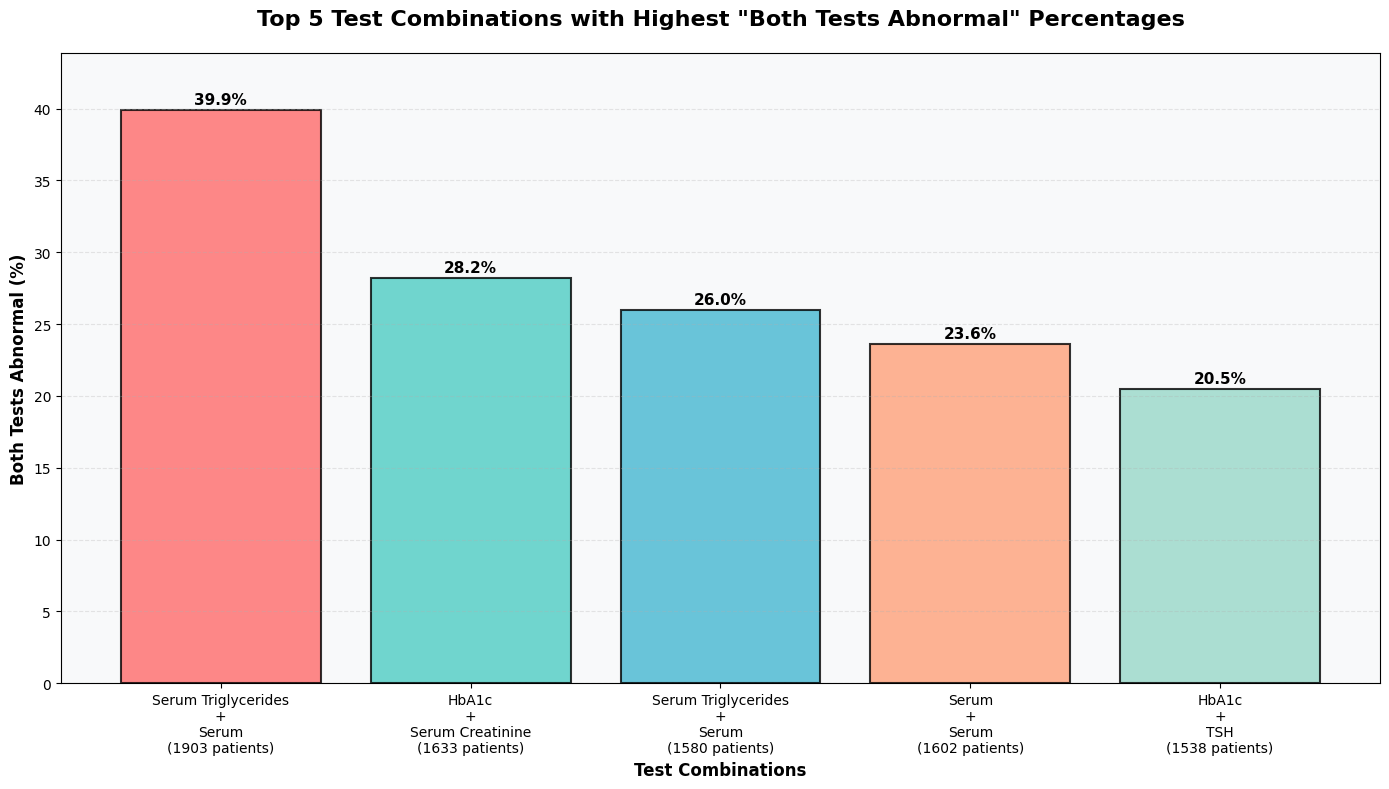

🏆 TOP 5 HIGHEST RISK TEST COMBINATIONS
1. Serum Triglycerides + Serum LDL Cholesterol
   📊 Both Tests Abnormal: 39.9%
   👥 Total Patients: 1,903
   📈 Individual Abnormal Rates: 57.4% | 68.6%

2. HbA1c + Serum Creatinine
   📊 Both Tests Abnormal: 28.2%
   👥 Total Patients: 1,633
   📈 Individual Abnormal Rates: 83.5% | 35.5%

3. Serum Triglycerides + Serum HDL Cholesterol
   📊 Both Tests Abnormal: 26.0%
   👥 Total Patients: 1,580
   📈 Individual Abnormal Rates: 57.1% | 38.0%

4. Serum HDL Cholesterol + Serum LDL Cholesterol
   📊 Both Tests Abnormal: 23.6%
   👥 Total Patients: 1,602
   📈 Individual Abnormal Rates: 37.9% | 68.7%

5. HbA1c + TSH
   📊 Both Tests Abnormal: 20.5%
   👥 Total Patients: 1,538
   📈 Individual Abnormal Rates: 76.6% | 32.6%

💡 INSIGHTS:
- Higher percentages indicate test combinations where patients frequently show abnormal results in both tests
- These combinations may indicate related health conditions or risk factors
- The patient count shows the statistical signi

In [13]:
# Create a bar chart for the top 5 test combinations with highest "Both Tests Abnormal" percentages
import matplotlib.pyplot as plt

# Get the top 5 combinations with highest both abnormal percentages
top_5_highest_risk = enhanced_summary_df.nlargest(5, 'Both_Abnormal_Numeric')

# Create the figure and axis
plt.figure(figsize=(14, 8))

# Prepare data for plotting
test_combinations = []
both_abnormal_values = []

for _, row in top_5_highest_risk.iterrows():
    # Create shorter labels for better readability
    test1_short = row['Test 1'].split()[0] if len(row['Test 1'].split()) > 2 else row['Test 1']
    test2_short = row['Test 2'].split()[0] if len(row['Test 2'].split()) > 2 else row['Test 2']
    
    combination_label = f"{test1_short}\n+\n{test2_short}\n({row['Total Patients']} patients)"
    test_combinations.append(combination_label)
    both_abnormal_values.append(row['Both_Abnormal_Numeric'])

# Create the bar chart
bars = plt.bar(range(len(test_combinations)), both_abnormal_values, 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8'],
               edgecolor='black', linewidth=1.5, alpha=0.8)

# Customize the chart
plt.title('Top 5 Test Combinations with Highest "Both Tests Abnormal" Percentages', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Test Combinations', fontsize=12, fontweight='bold')
plt.ylabel('Both Tests Abnormal (%)', fontsize=12, fontweight='bold')

# Set x-axis labels
plt.xticks(range(len(test_combinations)), test_combinations, fontsize=10)

# Add value labels on top of bars
for i, (bar, value) in enumerate(zip(bars, both_abnormal_values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2, 
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Customize grid and layout
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.ylim(0, max(both_abnormal_values) * 1.1)

# Add a subtle background color
plt.gca().set_facecolor('#F8F9FA')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print summary information
print("🏆 TOP 5 HIGHEST RISK TEST COMBINATIONS")
print("="*60)
for i, (_, row) in enumerate(top_5_highest_risk.iterrows(), 1):
    print(f"{i}. {row['Test 1']} + {row['Test 2']}")
    print(f"   📊 Both Tests Abnormal: {row['Both Tests Abnormal %']}")
    print(f"   👥 Total Patients: {row['Total Patients']:,}")
    print(f"   📈 Individual Abnormal Rates: {row['Test 1 Abnormal %']} | {row['Test 2 Abnormal %']}")
    print()

print("💡 INSIGHTS:")
print("- Higher percentages indicate test combinations where patients frequently show abnormal results in both tests")
print("- These combinations may indicate related health conditions or risk factors")
print("- The patient count shows the statistical significance of each combination")

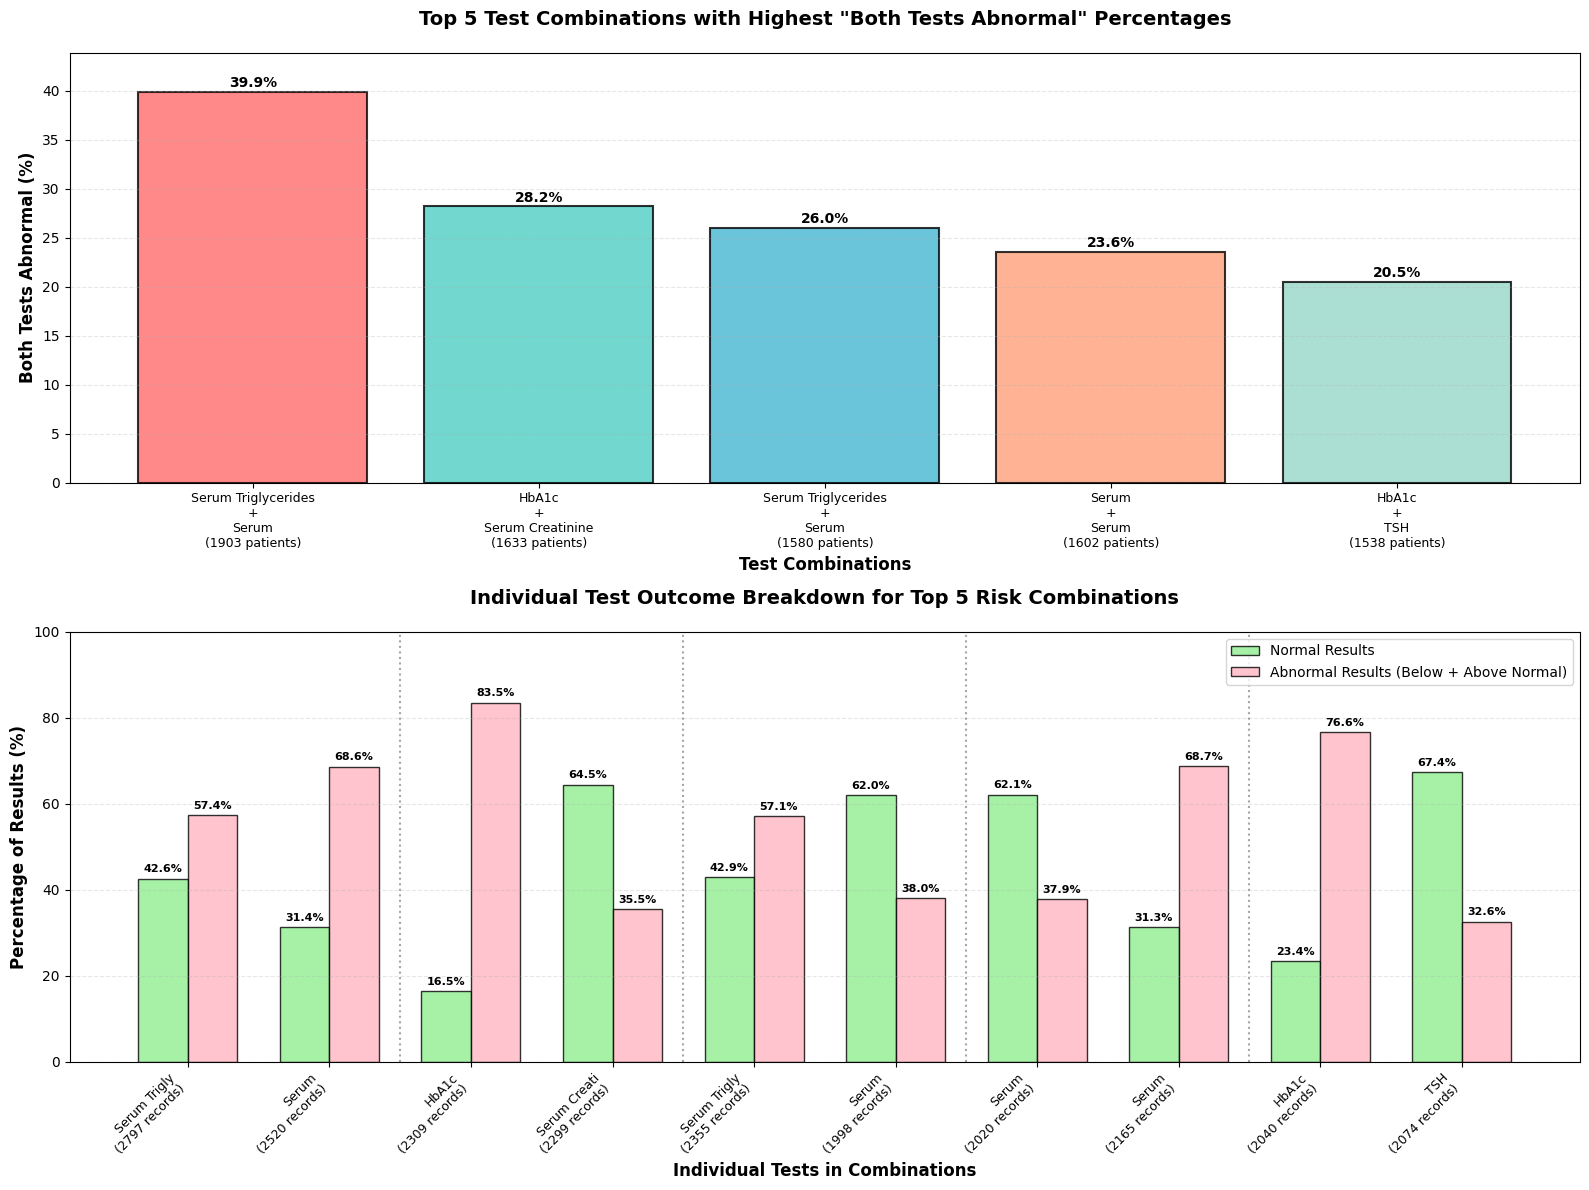

🎯 DETAILED BREAKDOWN OF TOP 5 HIGHEST RISK COMBINATIONS

1. Serum Triglycerides + Serum LDL Cholesterol
   👥 Total Patients: 1,903
   ⚠️ Both Tests Abnormal: 39.9%
   📊 Serum Triglycerides:
      ✅ Normal: 42.6% (1191 patients)
      📉 Below Normal: 0.0% (0 patients)
      📈 Above Normal: 57.4% (1606 patients)
   📊 Serum LDL Cholesterol:
      ✅ Normal: 31.4% (791 patients)
      📉 Below Normal: 0.0% (0 patients)
      📈 Above Normal: 68.6% (1729 patients)
------------------------------------------------------------

2. HbA1c + Serum Creatinine
   👥 Total Patients: 1,633
   ⚠️ Both Tests Abnormal: 28.2%
   📊 HbA1c:
      ✅ Normal: 16.5% (381 patients)
      📉 Below Normal: 0.1% (2 patients)
      📈 Above Normal: 83.4% (1926 patients)
   📊 Serum Creatinine:
      ✅ Normal: 64.5% (1482 patients)
      📉 Below Normal: 27.4% (629 patients)
      📈 Above Normal: 8.2% (188 patients)
------------------------------------------------------------

3. Serum Triglycerides + Serum HDL Cholesterol
 

In [14]:
import numpy as np

# Create a comprehensive visualization showing the top 5 test combinations with detailed outcome breakdown
import matplotlib.pyplot as plt

# Get the top 5 combinations with highest both abnormal percentages
top_5_highest_risk = enhanced_summary_df.nlargest(5, 'Both_Abnormal_Numeric')

# Prepare data for detailed visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Chart 1: Both Tests Abnormal Percentages (as before)
test_combinations = []
both_abnormal_values = []

for _, row in top_5_highest_risk.iterrows():
    test1_short = row['Test 1'].split()[0] if len(row['Test 1'].split()) > 2 else row['Test 1']
    test2_short = row['Test 2'].split()[0] if len(row['Test 2'].split()) > 2 else row['Test 2']
    
    combination_label = f"{test1_short}\n+\n{test2_short}\n({row['Total Patients']} patients)"
    test_combinations.append(combination_label)
    both_abnormal_values.append(row['Both_Abnormal_Numeric'])

bars1 = ax1.bar(range(len(test_combinations)), both_abnormal_values, 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8'],
               edgecolor='black', linewidth=1.5, alpha=0.8)

ax1.set_title('Top 5 Test Combinations with Highest "Both Tests Abnormal" Percentages', 
             fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Test Combinations', fontsize=12, fontweight='bold')
ax1.set_ylabel('Both Tests Abnormal (%)', fontsize=12, fontweight='bold')
ax1.set_xticks(range(len(test_combinations)))
ax1.set_xticklabels(test_combinations, fontsize=9)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_ylim(0, max(both_abnormal_values) * 1.1)

# Add value labels on top of bars
for i, (bar, value) in enumerate(zip(bars1, both_abnormal_values)):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2, 
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Chart 2: Detailed outcome breakdown for each test in the combinations
# Prepare data for the detailed breakdown
detailed_data = []
x_labels = []
colors_normal = []
colors_abnormal = []

position = 0
x_positions = []

for _, row in top_5_highest_risk.iterrows():
    test1, test2 = row['Test 1'], row['Test 2']
    patient_count = row['Total Patients']
    
    # Get patients who have both tests
    patients_with_both = df_pivot[(df_pivot[test1] > 0) & (df_pivot[test2] > 0)].index
    combo_data = df_combined[
        (df_combined['Patient Name'].isin(patients_with_both)) & 
        (df_combined['Standard Test Name'].isin([test1, test2]))
    ].copy()
    
    # Analyze each test separately
    for i, test_name in enumerate([test1, test2]):
        test_data = combo_data[combo_data['Standard Test Name'] == test_name]
        
        if len(test_data) > 0:
            # Count outcomes
            outcome_counts = test_data['Outcome'].value_counts()
            total = len(test_data)
            
            normal_count = outcome_counts.get('n', 0)
            below_count = outcome_counts.get('bn', 0)
            above_count = outcome_counts.get('an', 0)
            
            normal_pct = (normal_count / total * 100) if total > 0 else 0
            abnormal_pct = ((below_count + above_count) / total * 100) if total > 0 else 0
            
            # Create short label
            test_short = test_name.split()[0] if len(test_name.split()) > 2 else test_name[:12]
            if len(test_short) > 12:
                test_short = test_short[:12] + "..."
            
            detailed_data.append([normal_pct, abnormal_pct])
            x_labels.append(f"{test_short}\n({total} records)")
            x_positions.append(position)
            
            # Color coding
            colors_normal.append('#90EE90')  # Light green for normal
            colors_abnormal.append('#FFB6C1')  # Light pink for abnormal
            
            position += 1
    
    # Add separator
    if position < len(top_5_highest_risk) * 2:
        position += 0.5

# Create the detailed breakdown chart
x_pos = np.arange(len(detailed_data))
width = 0.35

normal_values = [data[0] for data in detailed_data]
abnormal_values = [data[1] for data in detailed_data]

bars_normal = ax2.bar(x_pos - width/2, normal_values, width, 
                     label='Normal Results', color='#90EE90', 
                     edgecolor='black', linewidth=1, alpha=0.8)

bars_abnormal = ax2.bar(x_pos + width/2, abnormal_values, width,
                       label='Abnormal Results (Below + Above Normal)', color='#FFB6C1',
                       edgecolor='black', linewidth=1, alpha=0.8)

ax2.set_title('Individual Test Outcome Breakdown for Top 5 Risk Combinations', 
             fontsize=14, fontweight='bold', pad=20)
ax2.set_xlabel('Individual Tests in Combinations', fontsize=12, fontweight='bold')
ax2.set_ylabel('Percentage of Results (%)', fontsize=12, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(x_labels, fontsize=9, rotation=45, ha='right')
ax2.legend(loc='upper right')
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.set_ylim(0, 100)

# Add value labels on bars
for bar, value in zip(bars_normal, normal_values):
    if value > 0:
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                f'{value:.1f}%', ha='center', va='bottom', fontsize=8, fontweight='bold')

for bar, value in zip(bars_abnormal, abnormal_values):
    if value > 0:
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                f'{value:.1f}%', ha='center', va='bottom', fontsize=8, fontweight='bold')

# Add separator lines between test combinations
separator_positions = []
pos = 1.5
for i in range(len(top_5_highest_risk) - 1):
    ax2.axvline(x=pos, color='gray', linestyle=':', alpha=0.7)
    separator_positions.append(pos)
    pos += 2

plt.tight_layout()
plt.show()

# Print detailed summary
print("🎯 DETAILED BREAKDOWN OF TOP 5 HIGHEST RISK COMBINATIONS")
print("="*80)

for i, (_, row) in enumerate(top_5_highest_risk.iterrows(), 1):
    test1, test2 = row['Test 1'], row['Test 2']
    patient_count = row['Total Patients']
    
    print(f"\n{i}. {test1} + {test2}")
    print(f"   👥 Total Patients: {patient_count:,}")
    print(f"   ⚠️ Both Tests Abnormal: {row['Both Tests Abnormal %']}")
    
    # Get individual test breakdown
    patients_with_both = df_pivot[(df_pivot[test1] > 0) & (df_pivot[test2] > 0)].index
    combo_data = df_combined[
        (df_combined['Patient Name'].isin(patients_with_both)) & 
        (df_combined['Standard Test Name'].isin([test1, test2]))
    ].copy()
    
    for test_name in [test1, test2]:
        test_data = combo_data[combo_data['Standard Test Name'] == test_name]
        
        if len(test_data) > 0:
            outcome_counts = test_data['Outcome'].value_counts()
            total = len(test_data)
            
            normal_pct = (outcome_counts.get('n', 0) / total * 100) if total > 0 else 0
            below_pct = (outcome_counts.get('bn', 0) / total * 100) if total > 0 else 0
            above_pct = (outcome_counts.get('an', 0) / total * 100) if total > 0 else 0
            
            print(f"   📊 {test_name}:")
            print(f"      ✅ Normal: {normal_pct:.1f}% ({outcome_counts.get('n', 0)} patients)")
            print(f"      📉 Below Normal: {below_pct:.1f}% ({outcome_counts.get('bn', 0)} patients)")
            print(f"      📈 Above Normal: {above_pct:.1f}% ({outcome_counts.get('an', 0)} patients)")
    
    print("-" * 60)

print(f"\n💡 KEY INSIGHTS:")
print("- The first chart shows which test combinations have the highest percentage of patients with both tests abnormal")
print("- The second chart breaks down each individual test's normal vs abnormal rates")
print("- Green bars = Normal results, Pink bars = Abnormal results (below + above normal combined)")
print("- Higher abnormal percentages in individual tests contribute to higher combined risk")

In [19]:
results_df.shape

(65, 3)

In [20]:
results_df

,subset,count,tests
30,"('Serum Creatinine', 'Blood Glucose')",4965,"[Serum Creatinine, Blood Glucose]"
51,"('Hepatitis B Surface Antigen', 'Hepatitis C A...",4853,"[Hepatitis B Surface Antigen, Hepatitis C Anti..."
52,"('Hepatitis B Surface Antigen', 'HIV Antibody')",4846,"[Hepatitis B Surface Antigen, HIV Antibody]"
54,"('Hepatitis C Antibody', 'HIV Antibody')",4846,"[Hepatitis C Antibody, HIV Antibody]"
5,"('TSH', 'Serum Creatinine')",3779,"[TSH, Serum Creatinine]"
...,...,...,...
48,"('Vitamin D3', 'Erythrocyte Sedimentation Rate')",1029,"[Vitamin D3, Erythrocyte Sedimentation Rate]"
4,"('TSH', 'Blood Urea Nitrogen')",1027,"[TSH, Blood Urea Nitrogen]"
49,"('Vitamin D3', 'Blood Glucose')",1018,"[Vitamin D3, Blood Glucose]"
57,"('Erythrocyte Sedimentation Rate', 'Blood Gluc...",1018,"[Erythrocyte Sedimentation Rate, Blood Glucose]"


In [23]:
enhanced_summary_df.to_csv("model_data_insight/enhanced_test_combination_summary.csv", index=False)
df_combined.to_csv("model_data_insight/cleaned_combined_dataset.csv", index=False)

In [21]:
enhanced_summary_df

,Test 1,Test 2,Total Patients,Test 1 Abnormal %,Test 2 Abnormal %,Both Tests Abnormal %,Both Tests Normal %,Mixed Results %,Both_Abnormal_Numeric,Both_Normal_Numeric,Mixed_Numeric
0,Serum Creatinine,Blood Glucose,4965,35.8%,0.0%,0.0%,64.6%,35.4%,0.0,64.6,35.4
1,Hepatitis B Surface Antigen,Hepatitis C Antibody,4853,0.2%,0.0%,0.0%,99.8%,0.2%,0.0,99.8,0.2
2,Hepatitis B Surface Antigen,HIV Antibody,4846,0.2%,0.0%,0.0%,99.8%,0.2%,0.0,99.8,0.2
3,Hepatitis C Antibody,HIV Antibody,4846,0.0%,0.0%,0.0%,100.0%,0.0%,0.0,100.0,0.0
4,TSH,Serum Creatinine,3779,29.5%,36.8%,9.1%,48.8%,42.1%,9.1,48.8,42.1
...,...,...,...,...,...,...,...,...,...,...,...
60,Vitamin D3,Erythrocyte Sedimentation Rate,1029,75.8%,0.0%,0.0%,23.6%,76.4%,0.0,23.6,76.4
61,TSH,Blood Urea Nitrogen,1027,30.1%,65.6%,15.3%,29.6%,55.1%,15.3,29.6,55.1
62,Vitamin D3,Blood Glucose,1018,71.2%,0.0%,0.0%,28.2%,71.8%,0.0,28.2,71.8
63,Erythrocyte Sedimentation Rate,Blood Glucose,1018,0.0%,0.0%,0.0%,100.0%,0.0%,0.0,100.0,0.0


# 🔬 **Choosing the Right Test Combinations for Health Data Analysis**

When analyzing lab test combinations from our dataset, different analysis goals require different selection criteria. Here's how to choose the best test combinations based on your specific needs:

---

## 🎯 **1. For Classification Models (Predicting Normal vs Abnormal)**

**Goal:** Build models that can predict whether test results will be normal or abnormal.

**What to Look For:**
- ✅ **Balanced datasets** where abnormal rates are **30-70%** for both tests
- ❌ **Avoid** combinations where one test is almost always normal (0-10% abnormal)
- ❌ **Avoid** combinations where one test is almost always abnormal (90-100% abnormal)

**Why:** If everyone has normal results, the model will just predict "normal" every time and won't learn meaningful patterns.

**Best Choices from Our Data:**
- TSH + Serum Creatinine (29.5% + 36.8% abnormal rates)
- Serum Triglycerides + Serum HDL Cholesterol (57.1% + 38.0% abnormal rates)

---

## 🔍 **2. For Association Rule Mining (Finding "If-Then" Patterns)**

**Goal:** Discover rules like "If Test A is abnormal → Then Test B is likely abnormal."

**What to Look For:**
- ✅ **Higher "Both Tests Abnormal" percentages** (15-40%)
- ✅ **Decent "Mixed Results" percentages** (30-60%)
- ❌ **Avoid** combinations where "Both Normal" dominates (>90%)

**Why:** You need variety in outcomes to find interesting patterns. If everyone is normal, there are no rules to discover.

**Best Choices from Our Data:**
- Serum Triglycerides + Serum LDL Cholesterol (39.9% both abnormal)
- HbA1c + Serum Creatinine (28.2% both abnormal)

---

## 🎭 **3. For Clustering (Grouping Similar Patients)**

**Goal:** Find natural groups of patients with similar health patterns.

**What to Look For:**
- ✅ **High "Mixed Results" percentages** (40-70%)
- ✅ **Diverse outcome patterns** across the population
- ❌ **Avoid** combinations where most patients fall into the same category

**Why:** Clustering works best when patients have diverse health profiles to create meaningful groups.

**Best Choices from Our Data:**
- HbA1c + Serum Creatinine (58.8% mixed results)
- HbA1c + TSH (58.6% mixed results)

---

## 📊 **4. General Selection Strategy**

### **Step 1: Filter by Sample Size**
- Choose combinations with **≥1,500 patients** for statistical reliability
- Larger samples = more robust results

### **Step 2: Check Balance**
- Look for abnormal rates between **20-80%** for individual tests
- Avoid extreme values (too rare or too common)

### **Step 3: Consider Your Analysis Goal**
- **Classification:** Prioritize balanced individual test abnormal rates
- **Association Rules:** Prioritize higher "Both Abnormal" percentages
- **Clustering:** Prioritize higher "Mixed Results" percentages

### **Step 4: Validate Medical Relevance**
- Choose test combinations that make clinical sense
- Examples: Lipid panel tests, kidney function tests, diabetes markers

---

## ⚠️ **What to Avoid**

- **Infectious disease markers** (Hepatitis, HIV) - usually 99%+ normal
- **Single-outcome tests** where one result dominates completely
- **Very small sample sizes** (<1,000 patients)
- **Medically unrelated test combinations**

---

This guidance ensures your analysis will have meaningful, statistically significant results that can provide actionable health insights! 🎯


## Dataset Selection Process

In order to choose the best dataset for applying **classification, association, and clustering techniques**, I am following these steps:

1. **Filter by Sample Size (Total Patients)**

   * I will prioritize datasets with a larger number of patients, since bigger sample sizes provide stronger and more reliable results.

2. **Check Balance for Classification**

   * For classification tasks, I will select datasets where the outcome distribution (Normal vs. Abnormal) is reasonably balanced.
   * Specifically, I want Test 1 Abnormal % and Test 2 Abnormal % to be neither too close to 0% nor too close to 100% ***(ideally between 30–70%)***.
   * This ensures the model has enough variation to learn effectively.

3. **Evaluate for Association Rule Mining**

   * For association analysis, I will look for datasets with meaningful variation between test results.
   * I will focus on datasets where **Both Tests Abnormal %** and **Mixed Results %** are not negligible.
   * If “Both Normal” dominates heavily, there will be fewer interesting patterns to discover.

4. **Evaluate for Clustering**

   * For clustering tasks, I will select datasets that contain diversity in patient outcomes.
   * A higher **Mixed Results %** is desirable, as it introduces variability and allows clusters to naturally form.
   * If all patients are similar (e.g., mostly Normal), clustering will not produce meaningful groups.

5. **Final Selection**

   * I will combine these criteria:

     * Large patient sample size.
     * Balanced distribution of Normal and Abnormal outcomes.
     * Sufficient variety in joint test results (especially Mixed Results).
   * The dataset that best satisfies these conditions will be used for the subsequent classification, association, and clustering experiments.


In [22]:
# Sort and filter the enhanced_summary_df to find the best datasets for classification

# First, convert percentage strings to numeric values for better sorting
enhanced_summary_df_sorted = enhanced_summary_df.copy()

# Convert percentage columns to numeric
enhanced_summary_df_sorted['Test1_Abnormal_Numeric'] = enhanced_summary_df_sorted['Test 1 Abnormal %'].str.rstrip('%').astype(float)
enhanced_summary_df_sorted['Test2_Abnormal_Numeric'] = enhanced_summary_df_sorted['Test 2 Abnormal %'].str.rstrip('%').astype(float)

# Define criteria for good classification datasets
min_patients = 1500  # Minimum sample size
min_abnormal_rate = 20  # Minimum abnormal rate (%)
max_abnormal_rate = 80  # Maximum abnormal rate (%)

# Filter datasets that meet classification criteria
classification_candidates = enhanced_summary_df_sorted[
    (enhanced_summary_df_sorted['Total Patients'] >= min_patients) &
    (enhanced_summary_df_sorted['Test1_Abnormal_Numeric'] >= min_abnormal_rate) &
    (enhanced_summary_df_sorted['Test1_Abnormal_Numeric'] <= max_abnormal_rate) &
    (enhanced_summary_df_sorted['Test2_Abnormal_Numeric'] >= min_abnormal_rate) &
    (enhanced_summary_df_sorted['Test2_Abnormal_Numeric'] <= max_abnormal_rate)
].copy()

# Calculate a "balance score" - closer to 50% abnormal rate is better for both tests
classification_candidates['Test1_Balance_Score'] = 100 - abs(classification_candidates['Test1_Abnormal_Numeric'] - 50)
classification_candidates['Test2_Balance_Score'] = 100 - abs(classification_candidates['Test2_Abnormal_Numeric'] - 50)
classification_candidates['Combined_Balance_Score'] = (classification_candidates['Test1_Balance_Score'] + classification_candidates['Test2_Balance_Score']) / 2

# Sort by combined balance score (higher is better) and then by total patients (higher is better)
classification_candidates = classification_candidates.sort_values(
    ['Combined_Balance_Score', 'Total Patients'], 
    ascending=[False, False]
)

print("🎯 BEST DATASETS FOR CLASSIFICATION ANALYSIS")
print("="*80)
print(f"Found {len(classification_candidates)} datasets meeting classification criteria:")
print(f"- Minimum {min_patients:,} patients")
print(f"- Both tests have {min_abnormal_rate}-{max_abnormal_rate}% abnormal rates")
print("\n" + "="*80)

if len(classification_candidates) > 0:
    # Display the top classification candidates
    print("TOP CLASSIFICATION DATASETS (sorted by balance score):")
    print("-" * 60)
    
    for i, (_, row) in enumerate(classification_candidates.head(10).iterrows(), 1):
        print(f"\n{i}. {row['Test 1']} + {row['Test 2']}")
        print(f"   👥 Total Patients: {row['Total Patients']:,}")
        print(f"   📊 Test 1 Abnormal Rate: {row['Test 1 Abnormal %']} (Balance Score: {row['Test1_Balance_Score']:.1f})")
        print(f"   📊 Test 2 Abnormal Rate: {row['Test 2 Abnormal %']} (Balance Score: {row['Test2_Balance_Score']:.1f})")
        print(f"   🎯 Combined Balance Score: {row['Combined_Balance_Score']:.1f}")
        print(f"   ⚖️ Both Abnormal: {row['Both Tests Abnormal %']} | Both Normal: {row['Both Tests Normal %']} | Mixed: {row['Mixed Results %']}")
    
    # Show the detailed table
    print(f"\n" + "="*100)
    print("DETAILED CLASSIFICATION CANDIDATES TABLE:")
    classification_display = classification_candidates[['Test 1', 'Test 2', 'Total Patients', 
                                                       'Test 1 Abnormal %', 'Test 2 Abnormal %',
                                                       'Combined_Balance_Score', 'Both Tests Abnormal %',
                                                       'Both Tests Normal %', 'Mixed Results %']].head(10)
    print(classification_display.to_string(index=False))
    
    # Recommend the best dataset
    best_dataset = classification_candidates.iloc[0]
    print(f"\n" + "🏆" * 60)
    print(f"RECOMMENDED DATASET FOR CLASSIFICATION:")
    print(f"🏆 {best_dataset['Test 1']} + {best_dataset['Test 2']}")
    print(f"   👥 Sample Size: {best_dataset['Total Patients']:,} patients")
    print(f"   📈 Test 1 ({best_dataset['Test 1']}): {best_dataset['Test 1 Abnormal %']} abnormal")
    print(f"   📈 Test 2 ({best_dataset['Test 2']}): {best_dataset['Test 2 Abnormal %']} abnormal")
    print(f"   🎯 Balance Score: {best_dataset['Combined_Balance_Score']:.1f}/100")
    print(f"   📊 Outcome Distribution:")
    print(f"      - Both Abnormal: {best_dataset['Both Tests Abnormal %']}")
    print(f"      - Both Normal: {best_dataset['Both Tests Normal %']}")
    print(f"      - Mixed Results: {best_dataset['Mixed Results %']}")
    print(f"🏆" * 60)

else:
    print("❌ No datasets found meeting the classification criteria.")
    print("\nLet's relax the criteria and show the best available options:")
    
    # Show all datasets sorted by sample size
    all_sorted = enhanced_summary_df_sorted.sort_values('Total Patients', ascending=False)
    
    print(f"\nTOP 10 DATASETS BY SAMPLE SIZE:")
    for i, (_, row) in enumerate(all_sorted.head(10).iterrows(), 1):
        print(f"{i:2d}. {row['Test 1']} + {row['Test 2']}")
        print(f"    👥 {row['Total Patients']:,} patients | Abnormal rates: {row['Test 1 Abnormal %']} & {row['Test 2 Abnormal %']}")

# Additional analysis: Show why some high-volume datasets are not suitable for classification
print(f"\n" + "⚠️" * 50)
print(f"WHY SOME HIGH-VOLUME DATASETS ARE NOT SUITABLE FOR CLASSIFICATION:")
print("-" * 70)

high_volume_poor_balance = enhanced_summary_df_sorted[
    (enhanced_summary_df_sorted['Total Patients'] >= 2000) &
    ((enhanced_summary_df_sorted['Test1_Abnormal_Numeric'] < 20) | 
     (enhanced_summary_df_sorted['Test1_Abnormal_Numeric'] > 80) |
     (enhanced_summary_df_sorted['Test2_Abnormal_Numeric'] < 20) | 
     (enhanced_summary_df_sorted['Test2_Abnormal_Numeric'] > 80))
].head(5)

for i, (_, row) in enumerate(high_volume_poor_balance.iterrows(), 1):
    reasons = []
    if row['Test1_Abnormal_Numeric'] < 20:
        reasons.append(f"Test 1 too normal ({row['Test 1 Abnormal %']})")
    if row['Test1_Abnormal_Numeric'] > 80:
        reasons.append(f"Test 1 too abnormal ({row['Test 1 Abnormal %']})")
    if row['Test2_Abnormal_Numeric'] < 20:
        reasons.append(f"Test 2 too normal ({row['Test 2 Abnormal %']})")
    if row['Test2_Abnormal_Numeric'] > 80:
        reasons.append(f"Test 2 too abnormal ({row['Test 2 Abnormal %']})")
    
    print(f"{i}. {row['Test 1']} + {row['Test 2']} ({row['Total Patients']:,} patients)")
    print(f"   ❌ Issues: {'; '.join(reasons)}")

print(f"\n✅ ANALYSIS COMPLETE! Use the recommended dataset for classification tasks.")

🎯 BEST DATASETS FOR CLASSIFICATION ANALYSIS
Found 8 datasets meeting classification criteria:
- Minimum 1,500 patients
- Both tests have 20-80% abnormal rates

TOP CLASSIFICATION DATASETS (sorted by balance score):
------------------------------------------------------------

1. Serum Triglycerides + Serum HDL Cholesterol
   👥 Total Patients: 1,580
   📊 Test 1 Abnormal Rate: 57.1% (Balance Score: 92.9)
   📊 Test 2 Abnormal Rate: 38.0% (Balance Score: 88.0)
   🎯 Combined Balance Score: 90.5
   ⚖️ Both Abnormal: 26.0% | Both Normal: 37.4% | Mixed: 36.6%

2. Serum Triglycerides + Serum LDL Cholesterol
   👥 Total Patients: 1,903
   📊 Test 1 Abnormal Rate: 57.4% (Balance Score: 92.6)
   📊 Test 2 Abnormal Rate: 68.6% (Balance Score: 81.4)
   🎯 Combined Balance Score: 87.0
   ⚖️ Both Abnormal: 39.9% | Both Normal: 19.7% | Mixed: 40.4%

3. Serum HDL Cholesterol + Serum LDL Cholesterol
   👥 Total Patients: 1,602
   📊 Test 1 Abnormal Rate: 37.9% (Balance Score: 87.9)
   📊 Test 2 Abnormal Rate: 6

In [24]:
# Sort and filter enhanced_summary_df to find the best datasets for clustering

print("🎯 BEST DATASETS FOR CLUSTERING ANALYSIS")
print("="*80)

# Convert percentage columns to numeric for clustering analysis
clustering_df = enhanced_summary_df_sorted.copy()

# Define criteria for good clustering datasets
min_patients_clustering = 1500  # Minimum sample size for clustering
min_mixed_results = 30  # Minimum mixed results percentage for diversity
max_both_normal = 70   # Maximum "both normal" percentage to ensure variety

# Filter datasets that meet clustering criteria
clustering_candidates = clustering_df[
    (clustering_df['Total Patients'] >= min_patients_clustering) &
    (clustering_df['Mixed_Numeric'] >= min_mixed_results) &
    (clustering_df['Both_Normal_Numeric'] <= max_both_normal)
].copy()

# Calculate a "diversity score" - higher mixed results and balanced abnormal distributions are better
clustering_candidates['Diversity_Score'] = (
    clustering_candidates['Mixed_Numeric'] * 0.6 +  # 60% weight for mixed results
    (100 - abs(clustering_candidates['Test1_Abnormal_Numeric'] - 50)) * 0.2 +  # 20% weight for Test 1 balance
    (100 - abs(clustering_candidates['Test2_Abnormal_Numeric'] - 50)) * 0.2     # 20% weight for Test 2 balance
)

# Sort by diversity score (higher is better) and then by total patients (higher is better)
clustering_candidates = clustering_candidates.sort_values(
    ['Diversity_Score', 'Total Patients'], 
    ascending=[False, False]
)

print(f"Found {len(clustering_candidates)} datasets meeting clustering criteria:")
print(f"- Minimum {min_patients_clustering:,} patients")
print(f"- At least {min_mixed_results}% mixed results (for diversity)")
print(f"- At most {max_both_normal}% both normal (to avoid homogeneity)")
print("\n" + "="*80)

if len(clustering_candidates) > 0:
    # Display the top clustering candidates
    print("TOP CLUSTERING DATASETS (sorted by diversity score):")
    print("-" * 60)
    
    for i, (_, row) in enumerate(clustering_candidates.head(10).iterrows(), 1):
        print(f"\n{i}. {row['Test 1']} + {row['Test 2']}")
        print(f"   👥 Total Patients: {row['Total Patients']:,}")
        print(f"   🎭 Mixed Results: {row['Mixed Results %']} (higher = more diverse)")
        print(f"   ✅ Both Normal: {row['Both Tests Normal %']} (lower = more variety)")
        print(f"   ⚠️ Both Abnormal: {row['Both Tests Abnormal %']}")
        print(f"   📊 Individual Abnormal Rates: {row['Test 1 Abnormal %']} & {row['Test 2 Abnormal %']}")
        print(f"   🎯 Diversity Score: {row['Diversity_Score']:.1f}/100")
    
    # Show the detailed table
    print(f"\n" + "="*120)
    print("DETAILED CLUSTERING CANDIDATES TABLE:")
    clustering_display = clustering_candidates[['Test 1', 'Test 2', 'Total Patients', 
                                               'Mixed Results %', 'Both Tests Normal %', 'Both Tests Abnormal %',
                                               'Test 1 Abnormal %', 'Test 2 Abnormal %',
                                               'Diversity_Score']].head(10)
    print(clustering_display.to_string(index=False))
    
    # Recommend the best dataset
    best_clustering_dataset = clustering_candidates.iloc[0]
    print(f"\n" + "🏆" * 60)
    print(f"RECOMMENDED DATASET FOR CLUSTERING:")
    print(f"🏆 {best_clustering_dataset['Test 1']} + {best_clustering_dataset['Test 2']}")
    print(f"   👥 Sample Size: {best_clustering_dataset['Total Patients']:,} patients")
    print(f"   🎭 Mixed Results: {best_clustering_dataset['Mixed Results %']} (excellent diversity)")
    print(f"   ✅ Both Normal: {best_clustering_dataset['Both Tests Normal %']} (good variety)")
    print(f"   ⚠️ Both Abnormal: {best_clustering_dataset['Both Tests Abnormal %']} (interesting patterns)")
    print(f"   📈 Individual Abnormal Rates:")
    print(f"      - {best_clustering_dataset['Test 1']}: {best_clustering_dataset['Test 1 Abnormal %']}")
    print(f"      - {best_clustering_dataset['Test 2']}: {best_clustering_dataset['Test 2 Abnormal %']}")
    print(f"   🎯 Diversity Score: {best_clustering_dataset['Diversity_Score']:.1f}/100")
    print(f"🏆" * 60)

else:
    print("❌ No datasets found meeting the strict clustering criteria.")
    print("\nLet's relax the criteria and show the best available options:")
    
    # Relax criteria and show top options by mixed results percentage
    relaxed_clustering = clustering_df[
        clustering_df['Total Patients'] >= 1000  # Lower minimum
    ].sort_values('Mixed_Numeric', ascending=False)
    
    print(f"\nTOP 10 DATASETS BY MIXED RESULTS PERCENTAGE (relaxed criteria):")
    for i, (_, row) in enumerate(relaxed_clustering.head(10).iterrows(), 1):
        print(f"{i:2d}. {row['Test 1']} + {row['Test 2']}")
        print(f"    👥 {row['Total Patients']:,} patients | Mixed: {row['Mixed Results %']} | Both Normal: {row['Both Tests Normal %']}")

# Show why clustering needs diversity
print(f"\n" + "💡" * 50)
print(f"WHY CLUSTERING NEEDS DIVERSE DATASETS:")
print("-" * 70)
print("✅ GOOD for clustering:")
print("   - High Mixed Results % (40-70%): Creates natural patient groups")
print("   - Balanced abnormal rates (20-80%): Allows meaningful clusters")
print("   - Moderate Both Normal % (20-60%): Ensures variety in patient profiles")
print()
print("❌ BAD for clustering:")
print("   - Very high Both Normal % (>80%): All patients look similar")
print("   - Very low Mixed Results % (<20%): Not enough pattern diversity")
print("   - Extreme abnormal rates (0-10% or 90-100%): One-sided distributions")

# Additional analysis: Show clustering potential by outcome patterns
print(f"\n" + "📊" * 50)
print(f"CLUSTERING POTENTIAL ANALYSIS:")
print("-" * 70)

if len(clustering_candidates) > 0:
    top_3_clustering = clustering_candidates.head(3)
    
    print("Top 3 datasets show excellent clustering potential:")
    for i, (_, row) in enumerate(top_3_clustering.iterrows(), 1):
        print(f"\n{i}. {row['Test 1']} + {row['Test 2']}")
        
        # Explain why this is good for clustering
        mixed_pct = row['Mixed_Numeric']
        both_normal_pct = row['Both_Normal_Numeric']
        both_abnormal_pct = row['Both_Abnormal_Numeric']
        
        print(f"   🎭 Diversity Analysis:")
        print(f"      - {mixed_pct:.1f}% patients have mixed results → Creates boundary clusters")
        print(f"      - {both_normal_pct:.1f}% patients are both normal → Forms healthy cluster")
        print(f"      - {both_abnormal_pct:.1f}% patients are both abnormal → Forms high-risk cluster")
        
        # Predict cluster types
        print(f"   🎯 Expected Cluster Types:")
        if both_normal_pct > 15:
            print(f"      ✅ Healthy Cluster: ~{both_normal_pct:.0f}% of patients")
        if both_abnormal_pct > 15:
            print(f"      🚨 High-Risk Cluster: ~{both_abnormal_pct:.0f}% of patients")
        if mixed_pct > 30:
            print(f"      ⚖️ Mixed-Risk Clusters: ~{mixed_pct:.0f}% of patients (2-3 sub-clusters)")

print(f"\n✅ CLUSTERING ANALYSIS COMPLETE!")
print(f"📈 Use the recommended dataset for clustering to discover natural patient health groups.")

🎯 BEST DATASETS FOR CLUSTERING ANALYSIS
Found 19 datasets meeting clustering criteria:
- Minimum 1,500 patients
- At least 30% mixed results (for diversity)
- At most 70% both normal (to avoid homogeneity)

TOP CLUSTERING DATASETS (sorted by diversity score):
------------------------------------------------------------

1. S.Iron + Vitamin D3
   👥 Total Patients: 1,635
   🎭 Mixed Results: 77.4% (higher = more diverse)
   ✅ Both Normal: 22.6% (lower = more variety)
   ⚠️ Both Abnormal: 0.0%
   📊 Individual Abnormal Rates: 0.0% & 76.6%
   🎯 Diversity Score: 71.1/100

2. Vitamin D3 + Complete Blood Count
   👥 Total Patients: 1,682
   🎭 Mixed Results: 77.4% (higher = more diverse)
   ✅ Both Normal: 22.6% (lower = more variety)
   ⚠️ Both Abnormal: 0.0%
   📊 Individual Abnormal Rates: 76.7% & 0.0%
   🎯 Diversity Score: 71.1/100

3. Blood Urea Nitrogen + Serum Creatinine
   👥 Total Patients: 2,870
   🎭 Mixed Results: 62.7% (higher = more diverse)
   ✅ Both Normal: 18.6% (lower = more variety

In [28]:
# Sort and filter enhanced_summary_df to find the best datasets for association rule mining

print("🎯 BEST DATASETS FOR ASSOCIATION RULE MINING")
print("="*80)

# Convert percentage columns to numeric for association analysis
association_df = enhanced_summary_df_sorted.copy()

# Define criteria for good association rule mining datasets
min_patients_association = 1500  # Minimum sample size for statistical significance
min_both_abnormal = 15  # Minimum "both abnormal" percentage for meaningful rules
min_mixed_results = 25  # Minimum mixed results for rule diversity
max_both_normal = 75   # Maximum "both normal" to ensure interesting patterns

# Filter datasets that meet association rule mining criteria
association_candidates = association_df[
    (association_df['Total Patients'] >= min_patients_association) &
    (association_df['Both_Abnormal_Numeric'] >= min_both_abnormal) &
    (association_df['Mixed_Numeric'] >= min_mixed_results) &
    (association_df['Both_Normal_Numeric'] <= max_both_normal)
].copy()

# Calculate an "association score" - higher both abnormal and mixed results are better
association_candidates['Association_Score'] = (
    association_candidates['Both_Abnormal_Numeric'] * 0.5 +  # 50% weight for both abnormal (main rules)
    association_candidates['Mixed_Numeric'] * 0.3 +           # 30% weight for mixed results (rule diversity)
    (100 - association_candidates['Both_Normal_Numeric']) * 0.2  # 20% weight for avoiding too much normal
)

# Sort by association score (higher is better) and then by total patients (higher is better)
association_candidates = association_candidates.sort_values(
    ['Association_Score', 'Total Patients'], 
    ascending=[False, False]
)

print(f"Found {len(association_candidates)} datasets meeting association rule mining criteria:")
print(f"- Minimum {min_patients_association:,} patients")
print(f"- At least {min_both_abnormal}% both abnormal (for strong rules)")
print(f"- At least {min_mixed_results}% mixed results (for rule diversity)")
print(f"- At most {max_both_normal}% both normal (to avoid trivial rules)")
print("\n" + "="*80)

if len(association_candidates) > 0:
    # Display the top association candidates
    print("TOP ASSOCIATION RULE MINING DATASETS (sorted by association score):")
    print("-" * 70)
    
    for i, (_, row) in enumerate(association_candidates.head(10).iterrows(), 1):
        print(f"\n{i}. {row['Test 1']} + {row['Test 2']}")
        print(f"   👥 Total Patients: {row['Total Patients']:,}")
        print(f"   🔗 Both Abnormal: {row['Both Tests Abnormal %']} (strong rules: If Test1 abnormal → Test2 abnormal)")
        print(f"   🎭 Mixed Results: {row['Mixed Results %']} (rule diversity)")
        print(f"   ✅ Both Normal: {row['Both Tests Normal %']} (baseline)")
        print(f"   📊 Individual Abnormal Rates: {row['Test 1 Abnormal %']} & {row['Test 2 Abnormal %']}")
        print(f"   🎯 Association Score: {row['Association_Score']:.1f}/100")
        
        # Explain potential rules
        both_abnormal = row['Both_Abnormal_Numeric']
        test1_abnormal = row['Test1_Abnormal_Numeric']
        test2_abnormal = row['Test2_Abnormal_Numeric']
        
        print(f"   💡 Potential Rules:")
        if both_abnormal > 20:
            confidence_1_to_2 = (both_abnormal / test1_abnormal * 100) if test1_abnormal > 0 else 0
            confidence_2_to_1 = (both_abnormal / test2_abnormal * 100) if test2_abnormal > 0 else 0
            print(f"      - If {row['Test 1']} abnormal → {row['Test 2']} abnormal (confidence: ~{confidence_1_to_2:.1f}%)")
            print(f"      - If {row['Test 2']} abnormal → {row['Test 1']} abnormal (confidence: ~{confidence_2_to_1:.1f}%)")
    
    # Show the detailed table
    print(f"\n" + "="*130)
    print("DETAILED ASSOCIATION RULE MINING CANDIDATES TABLE:")
    association_display = association_candidates[['Test 1', 'Test 2', 'Total Patients', 
                                                 'Both Tests Abnormal %', 'Mixed Results %', 'Both Tests Normal %',
                                                 'Test 1 Abnormal %', 'Test 2 Abnormal %',
                                                 'Association_Score']].head(10)
    print(association_display.to_string(index=False))
    
    # Recommend the best dataset
    best_association_dataset = association_candidates.iloc[0]
    print(f"\n" + "🏆" * 70)
    print(f"RECOMMENDED DATASET FOR ASSOCIATION RULE MINING:")
    print(f"🏆 {best_association_dataset['Test 1']} + {best_association_dataset['Test 2']}")
    print(f"   👥 Sample Size: {best_association_dataset['Total Patients']:,} patients")
    print(f"   🔗 Both Abnormal: {best_association_dataset['Both Tests Abnormal %']} (excellent for strong rules)")
    print(f"   🎭 Mixed Results: {best_association_dataset['Mixed Results %']} (good rule diversity)")
    print(f"   ✅ Both Normal: {best_association_dataset['Both Tests Normal %']} (reasonable baseline)")
    print(f"   📈 Individual Abnormal Rates:")
    print(f"      - {best_association_dataset['Test 1']}: {best_association_dataset['Test 1 Abnormal %']}")
    print(f"      - {best_association_dataset['Test 2']}: {best_association_dataset['Test 2 Abnormal %']}")
    print(f"   🎯 Association Score: {best_association_dataset['Association_Score']:.1f}/100")
    
    # Detailed rule analysis for the best dataset
    print(f"\n   🔍 EXPECTED ASSOCIATION RULES:")
    both_abnormal = best_association_dataset['Both_Abnormal_Numeric']
    test1_abnormal = best_association_dataset['Test1_Abnormal_Numeric']
    test2_abnormal = best_association_dataset['Test2_Abnormal_Numeric']
    both_normal = best_association_dataset['Both_Normal_Numeric']
    
    # Calculate rule metrics
    support_both_abnormal = both_abnormal / 100
    confidence_1_to_2 = (both_abnormal / test1_abnormal * 100) if test1_abnormal > 0 else 0
    confidence_2_to_1 = (both_abnormal / test2_abnormal * 100) if test2_abnormal > 0 else 0
    lift_1_to_2 = (confidence_1_to_2 / test2_abnormal * 100) if test2_abnormal > 0 else 0
    lift_2_to_1 = (confidence_2_to_1 / test1_abnormal * 100) if test1_abnormal > 0 else 0
    
    print(f"      Rule 1: {best_association_dataset['Test 1']} abnormal → {best_association_dataset['Test 2']} abnormal")
    print(f"         Support: {both_abnormal:.1f}% | Confidence: {confidence_1_to_2:.1f}% | Lift: {lift_1_to_2:.2f}")
    print(f"      Rule 2: {best_association_dataset['Test 2']} abnormal → {best_association_dataset['Test 1']} abnormal")
    print(f"         Support: {both_abnormal:.1f}% | Confidence: {confidence_2_to_1:.1f}% | Lift: {lift_2_to_1:.2f}")
    
    if both_normal > 15:
        print(f"      Rule 3: {best_association_dataset['Test 1']} normal → {best_association_dataset['Test 2']} normal")
        print(f"         Support: {both_normal:.1f}% | Confidence: ~{(both_normal/(100-test1_abnormal)*100):.1f}%")
    
    print(f"🏆" * 70)

else:
    print("❌ No datasets found meeting the strict association rule mining criteria.")
    print("\nLet's relax the criteria and show the best available options:")
    
    # Relax criteria and show top options by both abnormal percentage
    relaxed_association = association_df[
        association_df['Total Patients'] >= 1000  # Lower minimum
    ].sort_values('Both_Abnormal_Numeric', ascending=False)
    
    print(f"\nTOP 10 DATASETS BY BOTH ABNORMAL PERCENTAGE (relaxed criteria):")
    for i, (_, row) in enumerate(relaxed_association.head(10).iterrows(), 1):
        print(f"{i:2d}. {row['Test 1']} + {row['Test 2']}")
        print(f"    👥 {row['Total Patients']:,} patients | Both Abnormal: {row['Both Tests Abnormal %']} | Mixed: {row['Mixed Results %']}")

# Show why association rule mining needs specific patterns
print(f"\n" + "💡" * 60)
print(f"WHY ASSOCIATION RULE MINING NEEDS SPECIFIC PATTERNS:")
print("-" * 80)
print("✅ GOOD for association rules:")
print("   - High Both Abnormal % (20-40%): Creates strong 'If-Then' rules")
print("   - Moderate Mixed Results % (25-60%): Provides rule diversity")
print("   - Balanced individual abnormal rates: Enables bidirectional rules")
print()
print("❌ BAD for association rules:")
print("   - Very low Both Abnormal % (<10%): No meaningful associations")
print("   - Very high Both Normal % (>80%): Only trivial rules")
print("   - Extreme individual rates (0-5% or 95-100%): One-sided patterns")

# Additional analysis: Show rule potential for top candidates
print(f"\n" + "📋" * 60)
print(f"ASSOCIATION RULE POTENTIAL ANALYSIS:")
print("-" * 80)

if len(association_candidates) > 0:
    top_3_association = association_candidates.head(3)
    
    print("Top 3 datasets show excellent association rule potential:")
    for i, (_, row) in enumerate(top_3_association.iterrows(), 1):
        print(f"\n{i}. {row['Test 1']} + {row['Test 2']}")
        
        # Calculate detailed rule metrics
        both_abnormal = row['Both_Abnormal_Numeric']
        test1_abnormal = row['Test1_Abnormal_Numeric']
        test2_abnormal = row['Test2_Abnormal_Numeric']
        both_normal = row['Both_Normal_Numeric']
        mixed = row['Mixed_Numeric']
        
        print(f"   📊 Rule Potential:")
        print(f"      - Strong Rules: {both_abnormal:.1f}% patients show both abnormal patterns")
        print(f"      - Rule Diversity: {mixed:.1f}% patients show mixed patterns")
        print(f"      - Baseline Rules: {both_normal:.1f}% patients show both normal patterns")
        
        # Expected rule strength
        if both_abnormal > 25:
            print(f"   🔥 Expected Strong Rules (High Confidence):")
            confidence_1_to_2 = (both_abnormal / test1_abnormal * 100) if test1_abnormal > 0 else 0
            confidence_2_to_1 = (both_abnormal / test2_abnormal * 100) if test2_abnormal > 0 else 0
            print(f"      - {confidence_1_to_2:.1f}% of {row['Test 1']} abnormal cases also have {row['Test 2']} abnormal")
            print(f"      - {confidence_2_to_1:.1f}% of {row['Test 2']} abnormal cases also have {row['Test 1']} abnormal")
        
        if mixed > 40:
            print(f"   ⚖️ Expected Moderate Rules (Medium Confidence):")
            print(f"      - Various combinations of normal/abnormal patterns")
            print(f"      - Useful for understanding partial risk factors")

# Summary table with rule metrics
print(f"\n" + "📈" * 60)
print(f"ASSOCIATION RULE METRICS SUMMARY:")
print("-" * 80)

if len(association_candidates) > 0:
    rule_metrics_data = []
    for _, row in association_candidates.head(5).iterrows():
        both_abnormal = row['Both_Abnormal_Numeric']
        test1_abnormal = row['Test1_Abnormal_Numeric']
        test2_abnormal = row['Test2_Abnormal_Numeric']
        
        confidence_1_to_2 = (both_abnormal / test1_abnormal * 100) if test1_abnormal > 0 else 0
        confidence_2_to_1 = (both_abnormal / test2_abnormal * 100) if test2_abnormal > 0 else 0
        
        rule_metrics_data.append({
            'Test Combination': f"{row['Test 1']} + {row['Test 2']}",
            'Sample Size': f"{row['Total Patients']:,}",
            'Support (Both Abnormal)': f"{both_abnormal:.1f}%",
            'Confidence T1→T2': f"{confidence_1_to_2:.1f}%",
            'Confidence T2→T1': f"{confidence_2_to_1:.1f}%",
            'Association Score': f"{row['Association_Score']:.1f}"
        })
    
    rule_metrics_df = pd.DataFrame(rule_metrics_data)
    print(rule_metrics_df.to_string(index=False))

print(f"\n✅ ASSOCIATION RULE MINING ANALYSIS COMPLETE!")
print(f"🔗 Use the recommended dataset to discover meaningful 'If-Then' health patterns.")
print(f"📊 Higher association scores indicate better potential for finding strong, actionable rules.")

🎯 BEST DATASETS FOR ASSOCIATION RULE MINING
Found 7 datasets meeting association rule mining criteria:
- Minimum 1,500 patients
- At least 15% both abnormal (for strong rules)
- At least 25% mixed results (for rule diversity)
- At most 75% both normal (to avoid trivial rules)

TOP ASSOCIATION RULE MINING DATASETS (sorted by association score):
----------------------------------------------------------------------

1. HbA1c + Serum Creatinine
   👥 Total Patients: 1,633
   🔗 Both Abnormal: 28.2% (strong rules: If Test1 abnormal → Test2 abnormal)
   🎭 Mixed Results: 58.8% (rule diversity)
   ✅ Both Normal: 13.0% (baseline)
   📊 Individual Abnormal Rates: 83.5% & 35.5%
   🎯 Association Score: 49.1/100
   💡 Potential Rules:
      - If HbA1c abnormal → Serum Creatinine abnormal (confidence: ~33.8%)
      - If Serum Creatinine abnormal → HbA1c abnormal (confidence: ~79.4%)

2. Serum Triglycerides + Serum LDL Cholesterol
   👥 Total Patients: 1,903
   🔗 Both Abnormal: 39.9% (strong rules: If Te

In [29]:
# Export the candidate datasets to CSV files
classification_candidates.to_csv("model_data_insight/classification_candidates.csv", index=False)
clustering_candidates.to_csv("model_data_insight/clustering_candidates.csv", index=False)
association_candidates.to_csv("model_data_insight/association_candidates.csv", index=False)